# Credit Card Customer Segmentation Project

## About Dataset


This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about `9000 active credit card holders` during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* `CUST_ID` : Identification of Credit Card holder (Categorical)
* `BALANCE` : Balance amount left in their account to make purchases (
* `BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently     updated)
* `PURCHASES` : Amount of purchases made from account
* `ONEOFF_PURCHASES` : Maximum purchase amount done in one-go
* `INSTALLMENTS_PURCHASES` : Amount of purchase done in installment
* `CASH_ADVANCE` : Cash in advance given by the user
* `PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not       frequently purchased)
* `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently         purchased)
* `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not           frequently done)
* `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
* `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
* `PURCHASES_TRX`: Numbe of purchase transactions made
* `CREDIT_LIMIT` : Limit of Credit Card for user
* `PAYMENTS` : Amount of Payment done by user
* `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
* `PRCFULLPAYMENT` : Percent of full payment paid by user
* `TENURE` : Tenure of credit card service for user



# Project Steps

 1. **Import Necessary Libraries**
 2. **Exploratory Data Analysis**
 3. **Data Preprocessing**
 4. **Modeling**
 5. **Results**

## Importing necessary libraries

In [1]:
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans,DBSCAN, Birch, MeanShift, AffinityPropagation 
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn import metrics 


# EDA

In [2]:
df=pd.read_csv(r"D:\ishan\Machine Learning DOC\Dataset\CC GENERAL.csv")

In [3]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.drop('CUST_ID',axis=1, inplace=True)

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# Let's Plot to become one with the data


In [8]:
#plt.style.use('seaborn')

#i= 0
#while i < len(df.columns):
   # try:
   #     fig = plt.figure(figsize = (8,2.5),dpi = 120)
    #    plt.stubplot(1,2,1)
      #  plt.hist(df[df.columns[i]], bins = 5)
       # plt.title(df.columns[i])
        #i += 1
        #plt.subplot(1,2,2)
        #plt.hist(df[df.columns[i]], bins = 5)
       # plt.title(df.columns[i])
        #i += 1
    #except:
     #   continue
#plt.show()        

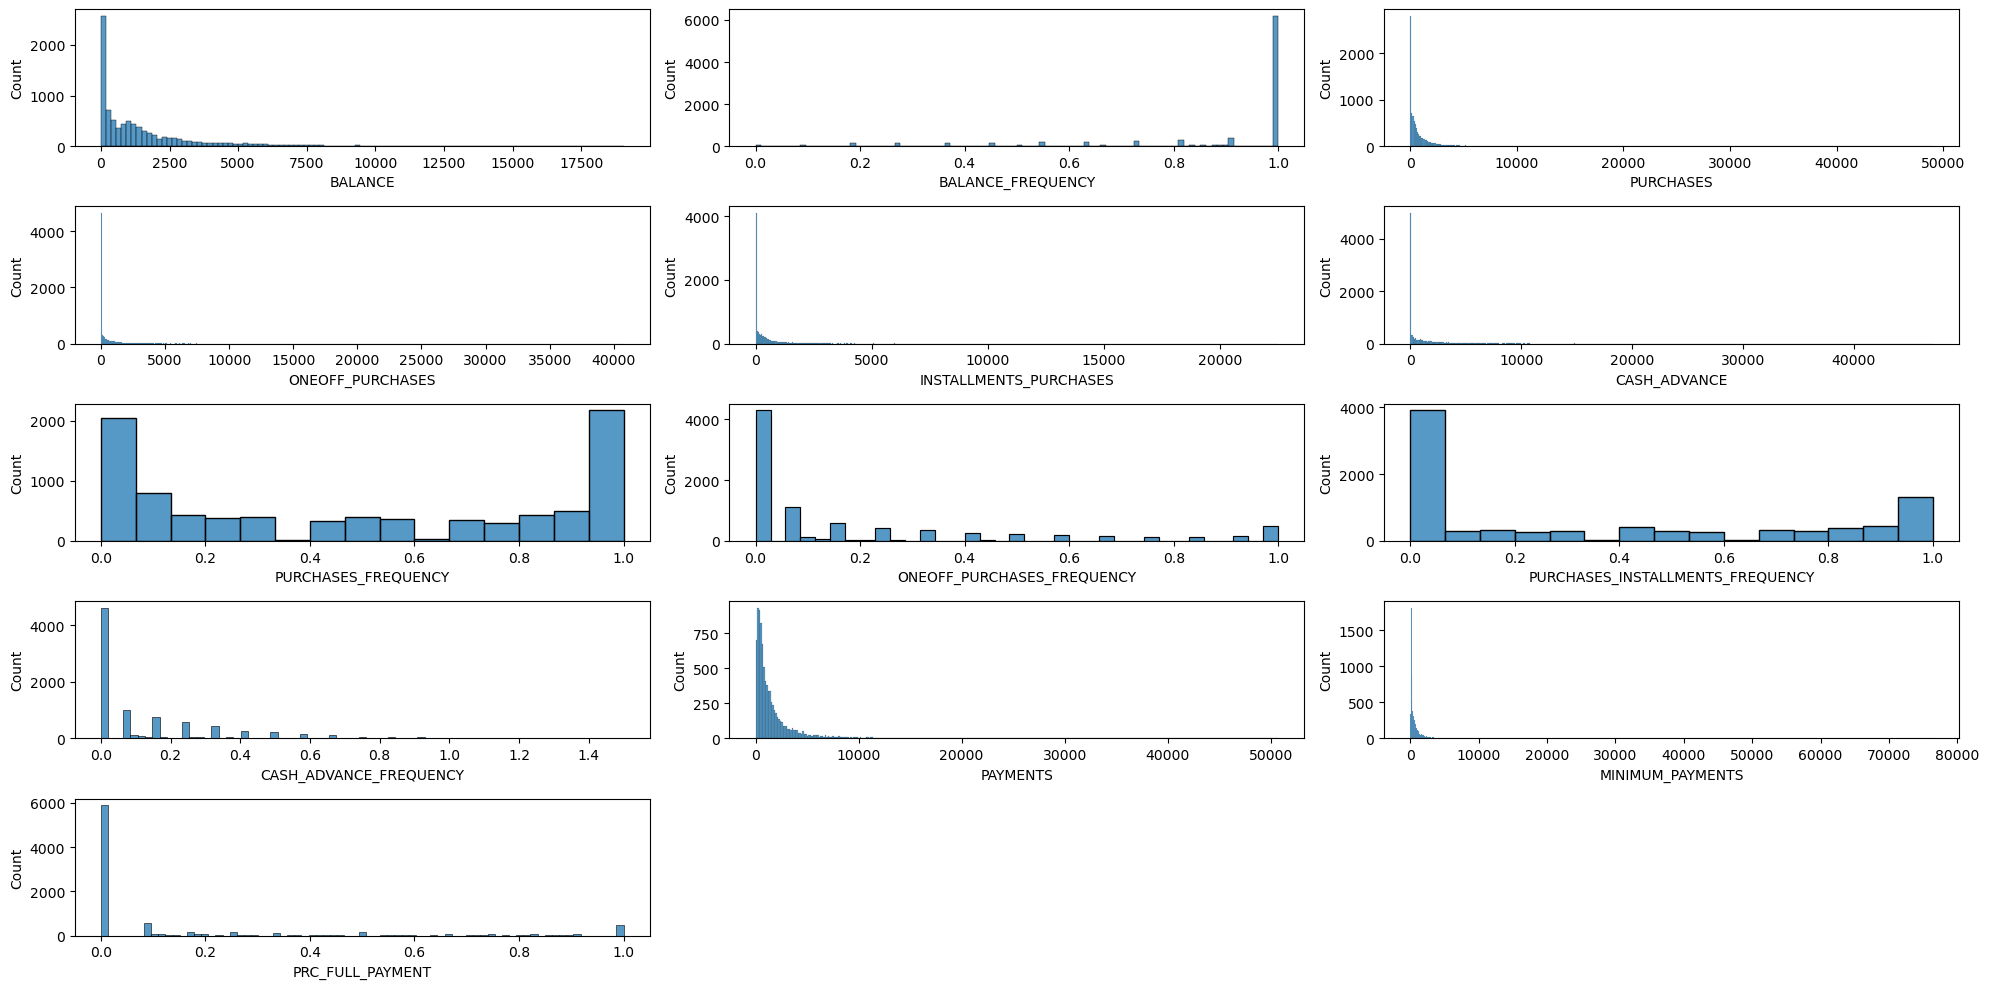

In [9]:
num_var=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

#create figures with subplot
fig, axs=plt.subplots(nrows=5,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.histplot(x=var,data=df,ax=axs[i])
    
    
#remove the 14th subplot
fig.delaxes(axs[13])

#remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

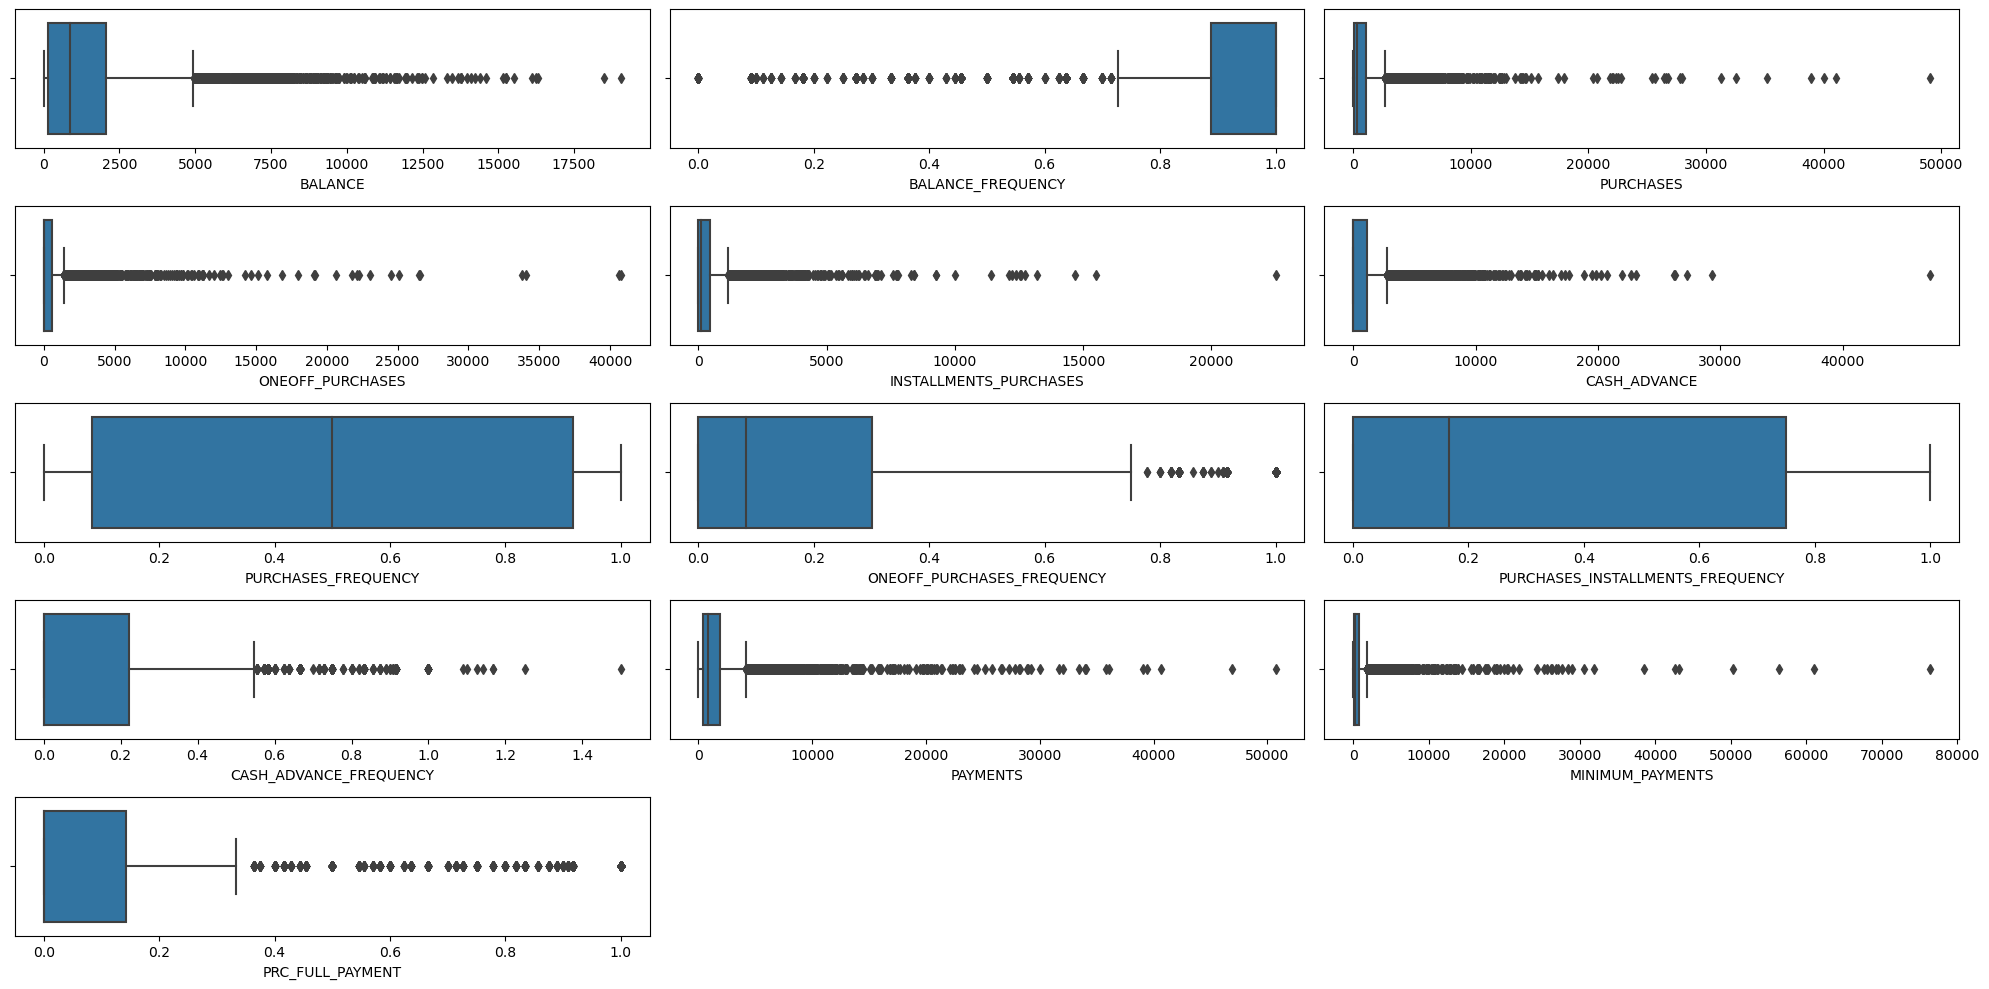

In [10]:
num_var=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

#create figures with subplot
fig, axs=plt.subplots(nrows=5,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
    
#remove the 14th subplot
fig.delaxes(axs[13])

#remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

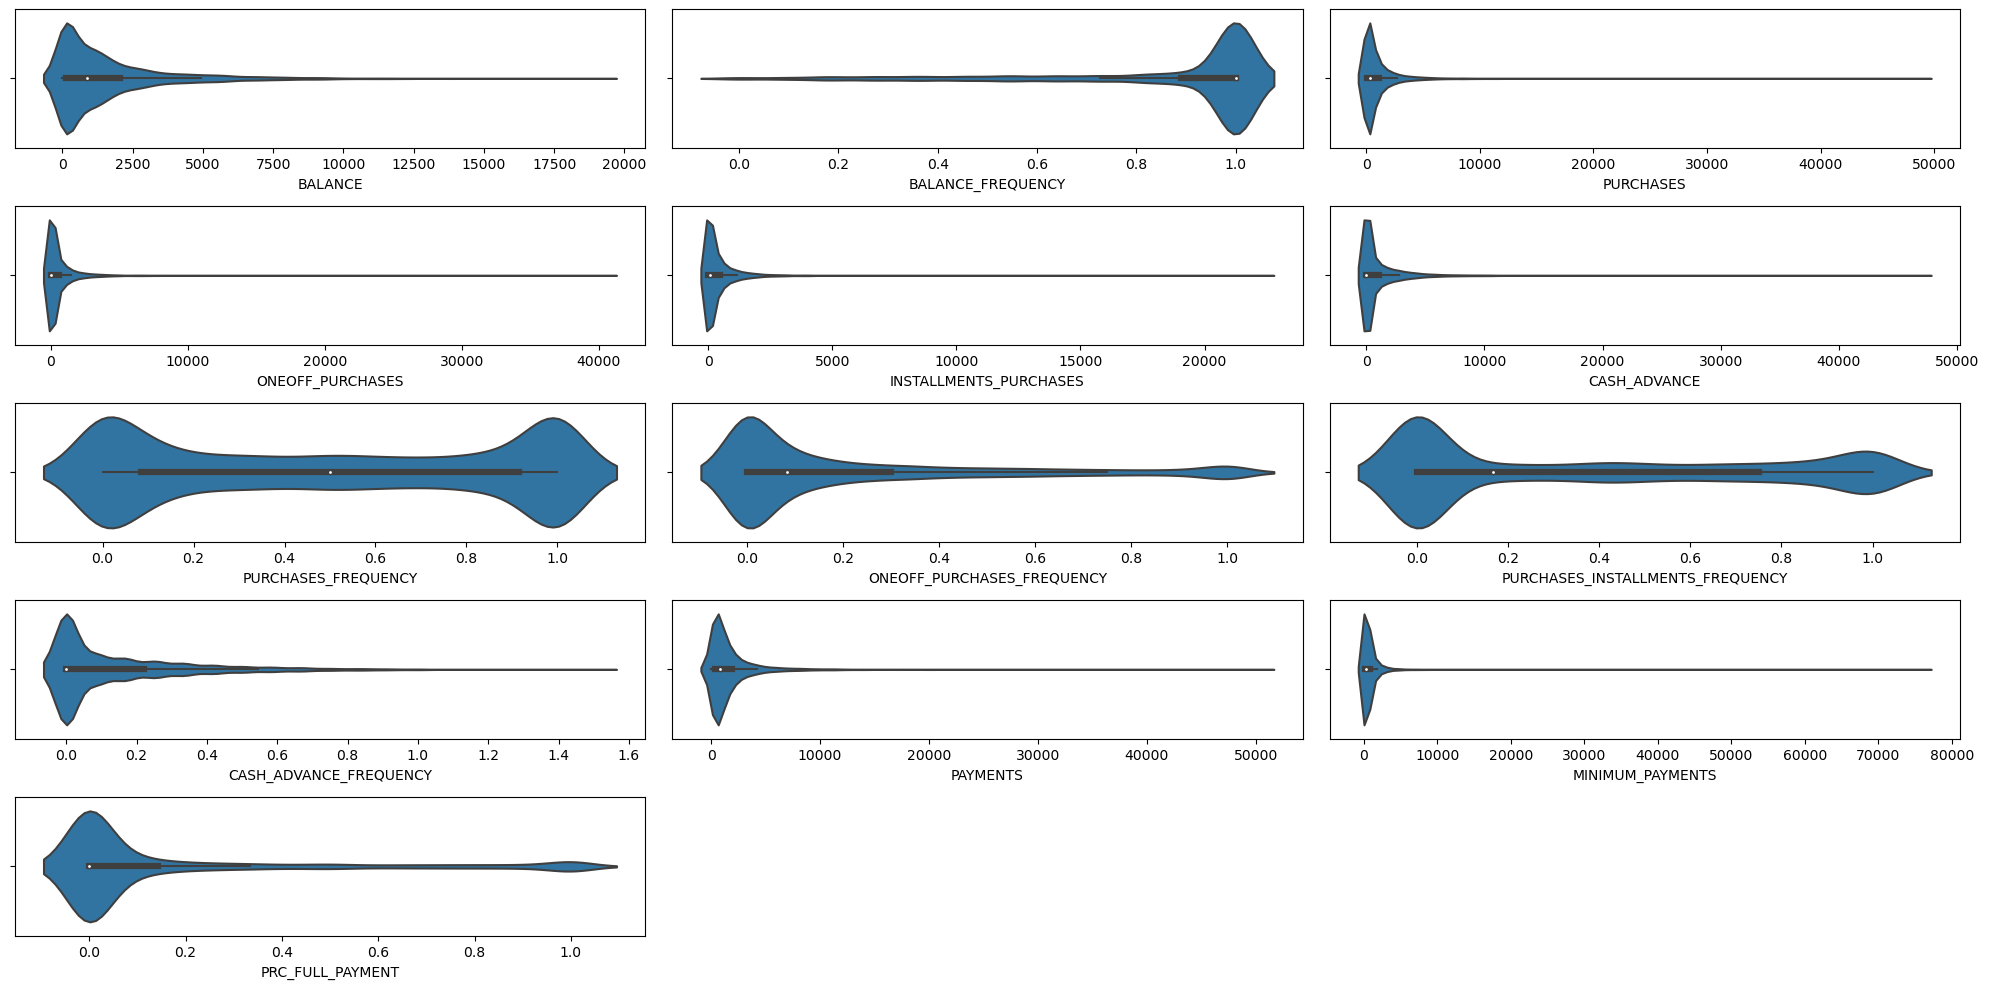

In [11]:
num_var=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

#create figures with subplot
fig, axs=plt.subplots(nrows=5,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.violinplot(x=var,data=df,ax=axs[i])
    
    
#remove the 14th subplot
fig.delaxes(axs[13])

#remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

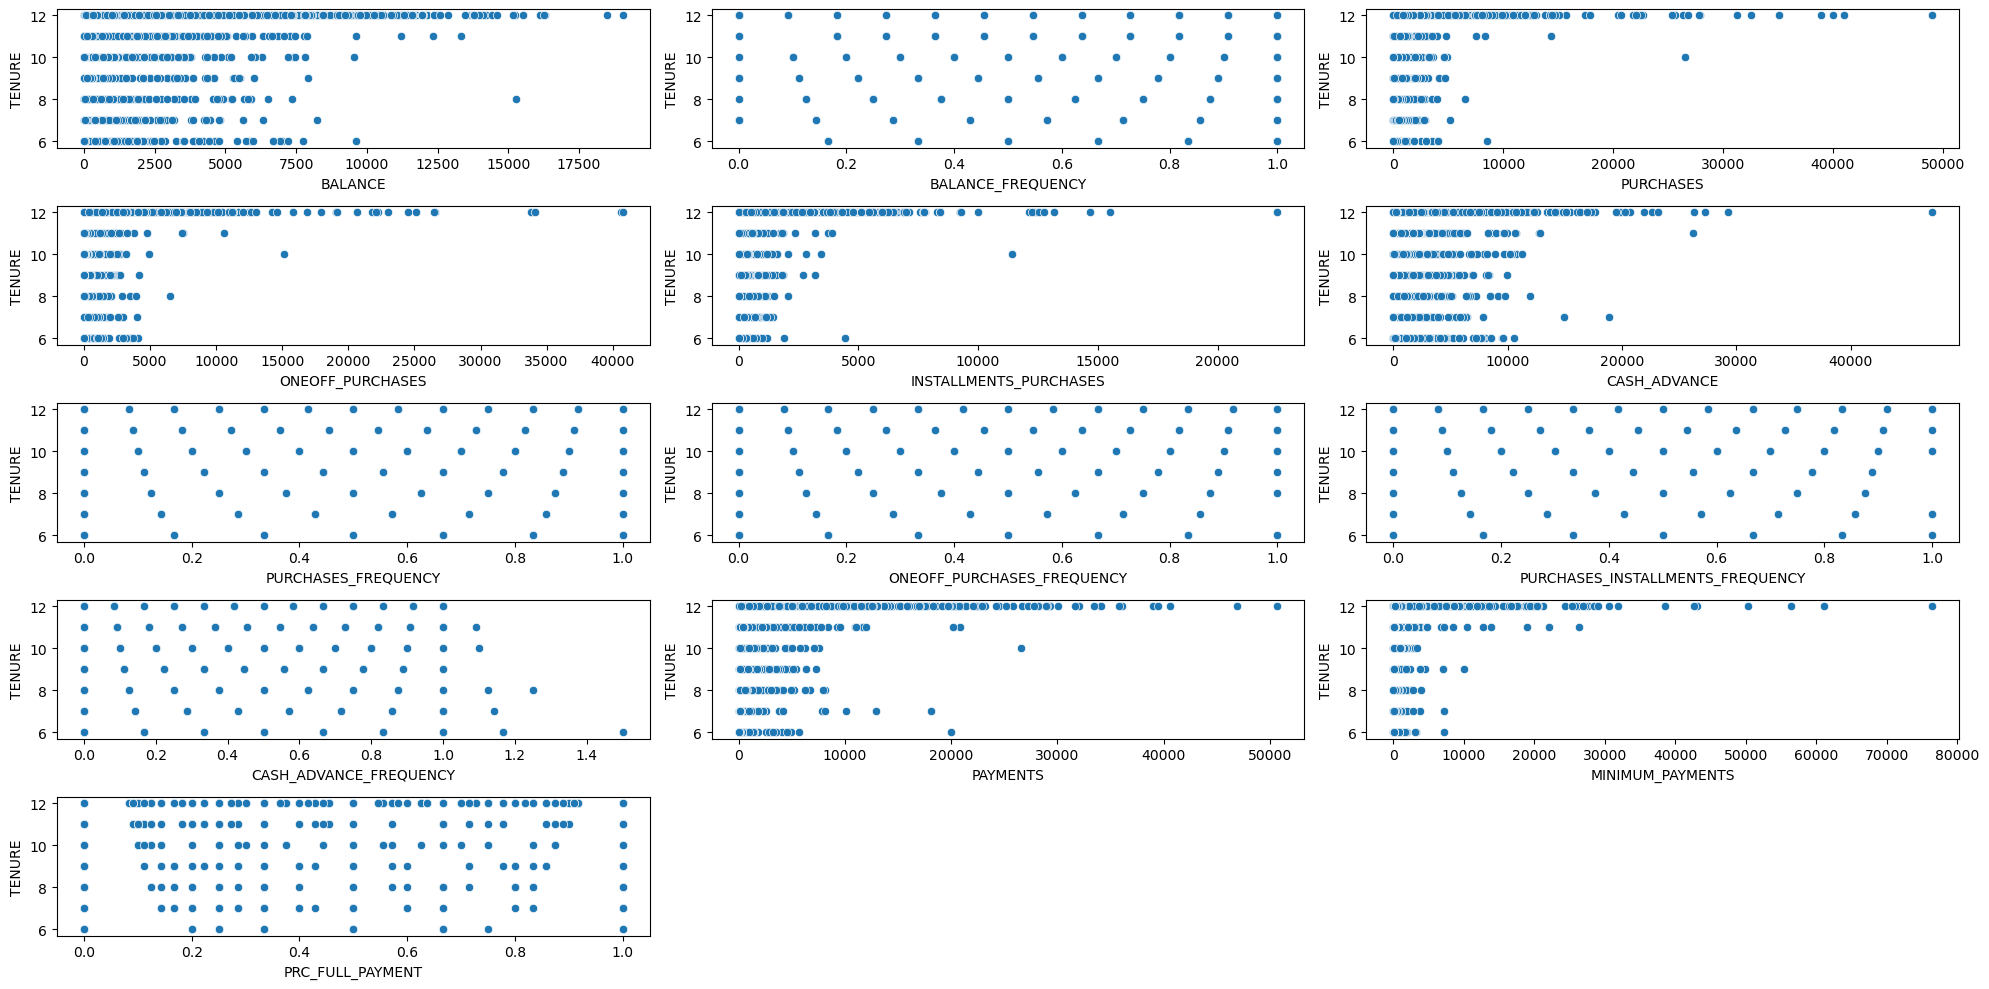

In [12]:
num_var=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

#create figures with subplot
fig, axs=plt.subplots(nrows=5,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate (num_var):
    sns.scatterplot(x=var,y='TENURE',data=df,ax=axs[i])
    
    
#remove the 14th subplot
fig.delaxes(axs[13])

#remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

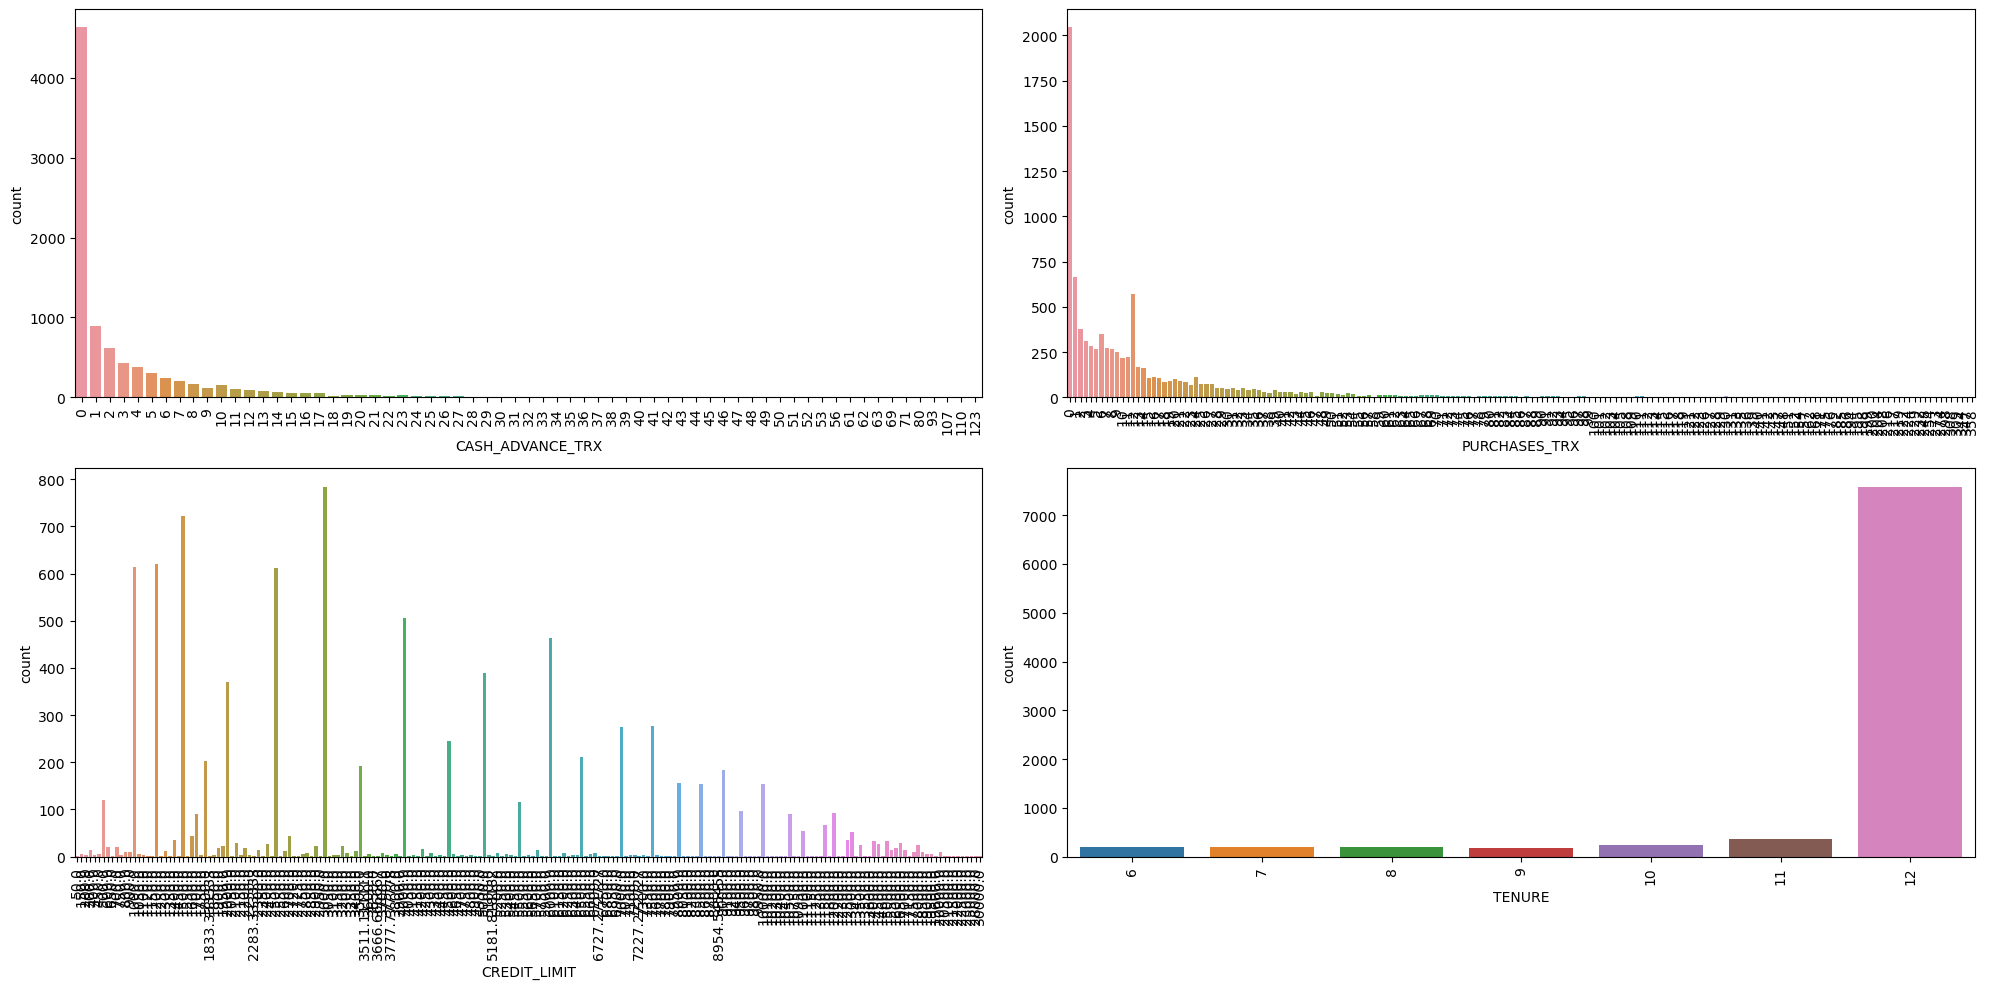

In [13]:
# list of categorical variable to plot
cat_vars=['CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','TENURE']
#create figures with subplot
fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axs=axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.countplot(x=var,data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
#adjusting space between subplots
fig.tight_layout()

plt.show()


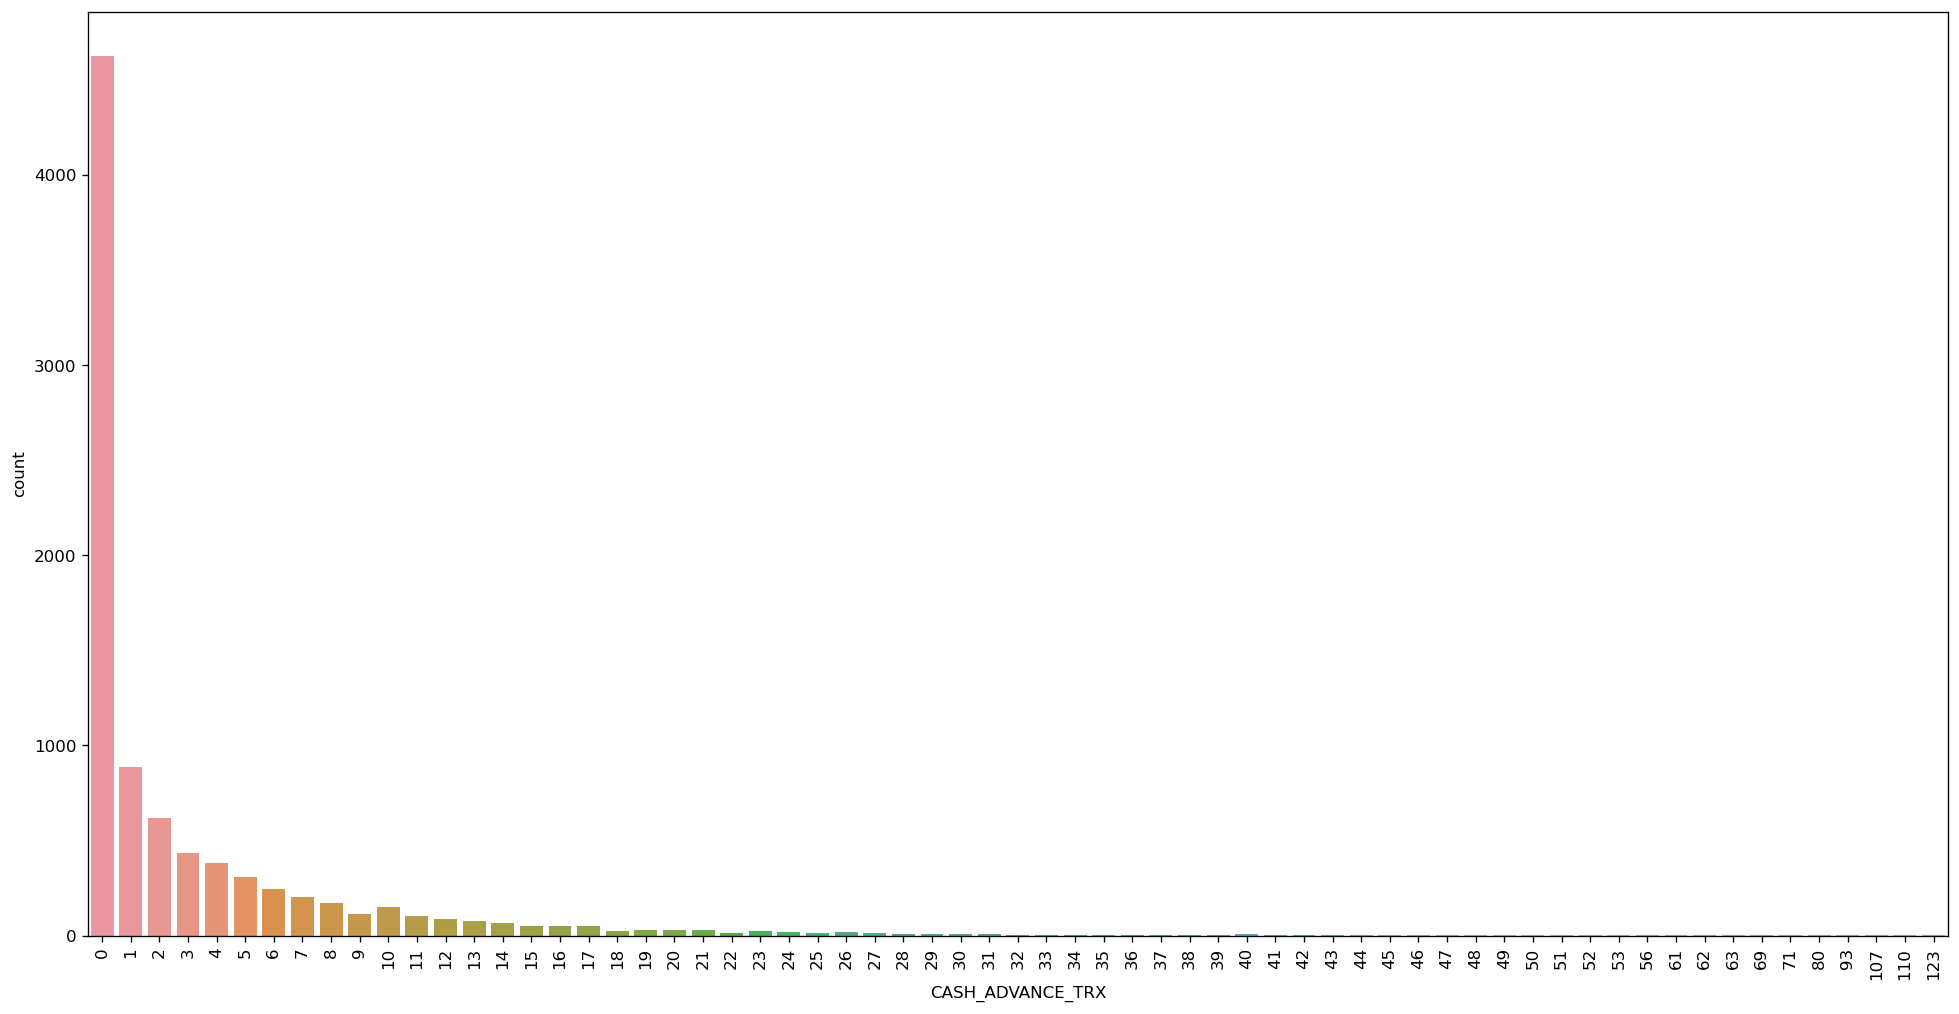

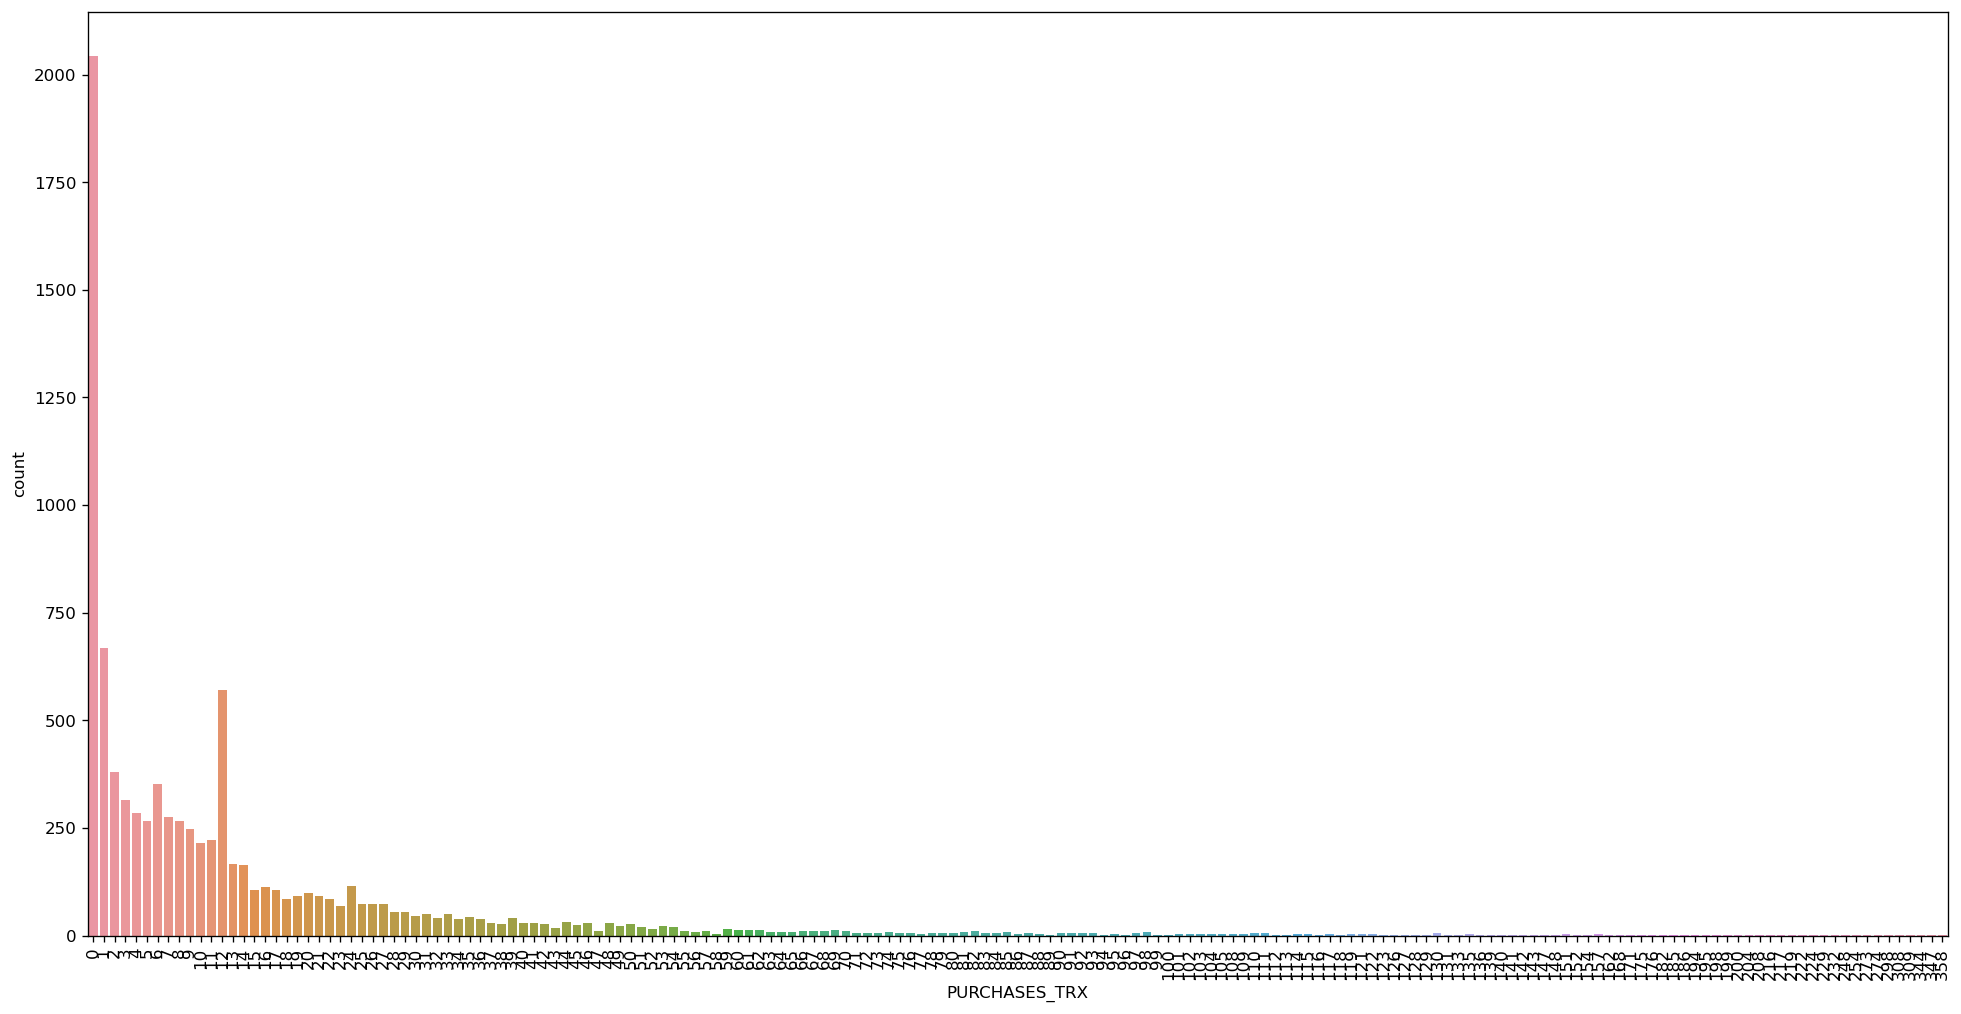

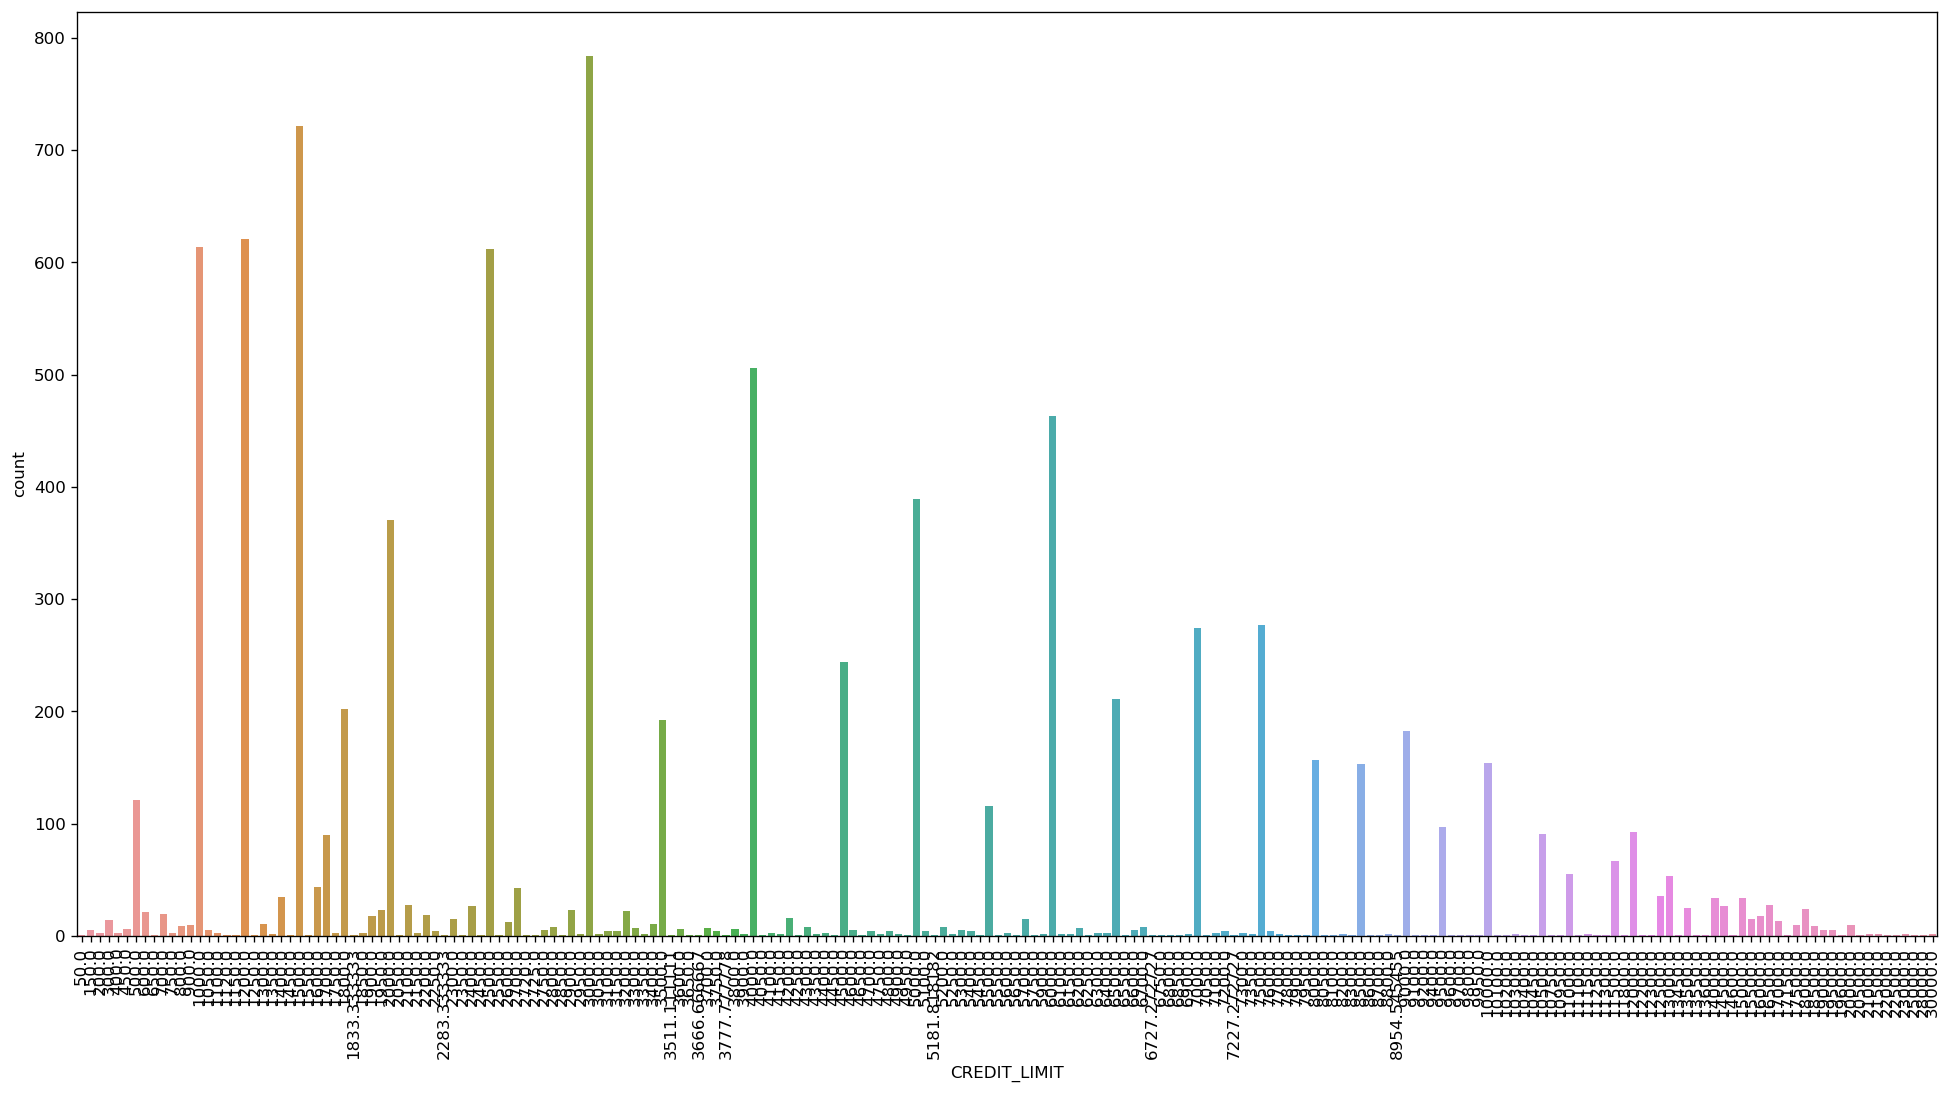

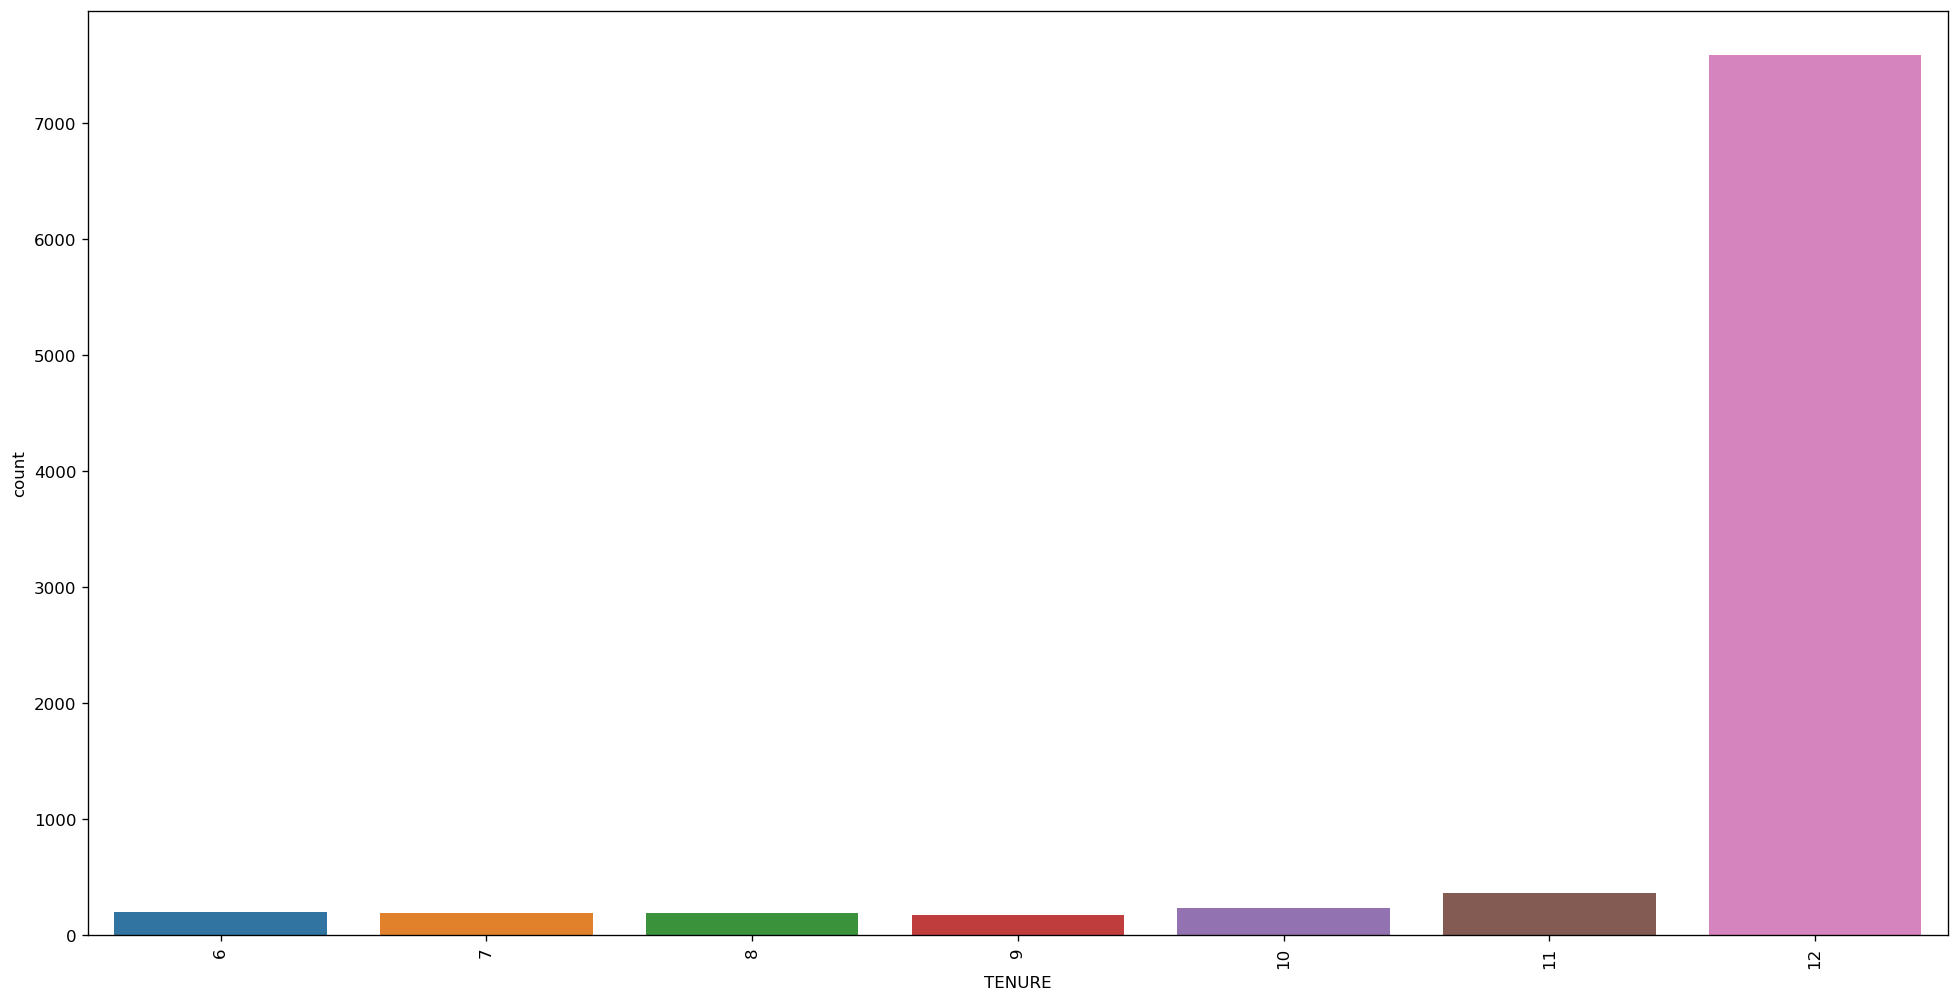

In [14]:
#disc_features = ['CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','TENURE']
for i in range(4):
    
    fig = plt.figure(figsize =(20,10), dpi = 120)
    sns.countplot(x=cat_vars[i], data=df)
    plt.xticks(rotation=90)
    i += 1

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
Mask=df['CREDIT_LIMIT'].isnull()
print(Mask)

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Name: CREDIT_LIMIT, Length: 8950, dtype: bool


In [18]:
df[Mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [19]:
Data = df[Mask == False]
df.reset_index(drop = True, inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [20]:
Mask=df['MINIMUM_PAYMENTS'].isnull()
df[Mask].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   313.000000         313.000000   313.000000        313.000000   
mean    555.441321           0.389403   393.087284        250.433387   
std    1292.687887           0.408341   757.905701        624.453991   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.187069           0.090909     1.400000          0.000000   
50%      16.848358           0.181818   130.400000          0.000000   
75%     286.686616           1.000000   399.950000        176.030000   
max    9164.724752           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              313.000000    313.000000           313.000000   
mean               142.653898    559.136698             0.336043   
std                311.289043   1185.132567             0.372517   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.166667   
75%                152.280000    480.104401             0.583333   
max               2959.240000   7616.064965             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  313.000000                        313.000000   
mean                     0.107886                          0.244670   
std                      0.227370                          0.359756   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              313.000000        313.000000     313.000000    313.000000   
mean                 0.067169          1.460064       5.833866   3731.789137   
std                  0.130087          3.182359       9.600908   2924.606153   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   3000.000000   
75%                  0.083333          1.000000       8.000000   5000.000000   
max                  1.000000         21.000000      77.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    313.000000               0.0             313.0  313.000000  
mean     322.286168               NaN               0.0   11.063898  
std     1996.658905               NaN               0.0    1.869734  
min        0.000000               NaN               0.0    6.000000  
25%        0.000000               NaN               0.0   12.000000  
50%        0.000000               NaN               0.0   12.000000  
75%        0.000000               NaN               0.0   12.000000  
max    29272.486070               NaN               0.0   12.000000

In [21]:
mask_1 =df['MINIMUM_PAYMENTS'].notnull()
mask_2 =df['PRC_FULL_PAYMENT'] == 0
len(df[mask_1][mask_2])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19216\3689171173.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[mask_1][mask_2])


5590

In [22]:
mask_1

0        True
1        True
2        True
3       False
4        True
        ...  
8945     True
8946    False
8947     True
8948     True
8949     True
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: bool

In [23]:
mask_2

0        True
1       False
2        True
3        True
4        True
        ...  
8945    False
8946     True
8947    False
8948    False
8949     True
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: bool

In [24]:
Mask = df['MINIMUM_PAYMENTS'].notnull()
df[Mask]['MINIMUM_PAYMENTS'].agg(['min','max','mean','median','std','var'])

min       1.916300e-02
max       7.640621e+04
mean      8.642065e+02
median    3.123439e+02
std       2.372447e+03
var       5.628503e+06
Name: MINIMUM_PAYMENTS, dtype: float64

In [25]:
df.corr().loc['MINIMUM_PAYMENTS'].sort_values(ascending=False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398684
CASH_ADVANCE                        0.140107
BALANCE_FREQUENCY                   0.132569
INSTALLMENTS_PURCHASES              0.132172
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126651
CASH_ADVANCE_TRX                    0.109739
CASH_ADVANCE_FREQUENCY              0.098838
PURCHASES_TRX                       0.096333
PURCHASES                           0.093860
TENURE                              0.059444
ONEOFF_PURCHASES                    0.048755
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PRC_FULL_PAYMENT                   -0.140379
Name: MINIMUM_PAYMENTS, dtype: float64

In [26]:
df.dropna(inplace=True)
df.reset_index(drop = True, inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

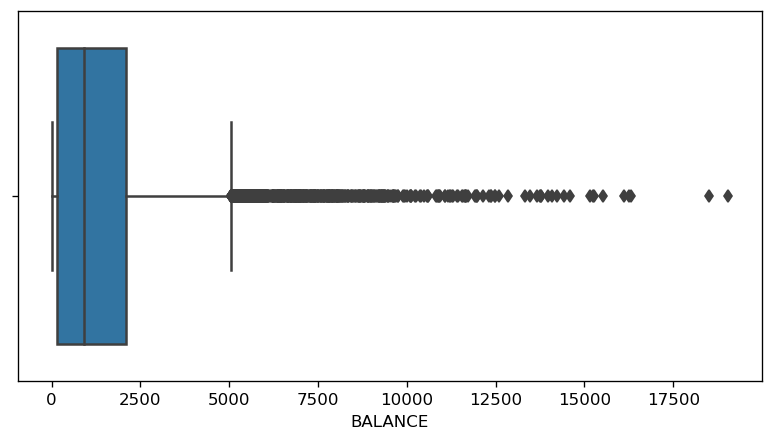

In [27]:
i = 0
plt.figure(figsize = (8,4), dpi = 120)
sns.boxplot(x = df.columns[i],data = df)
plt.show()

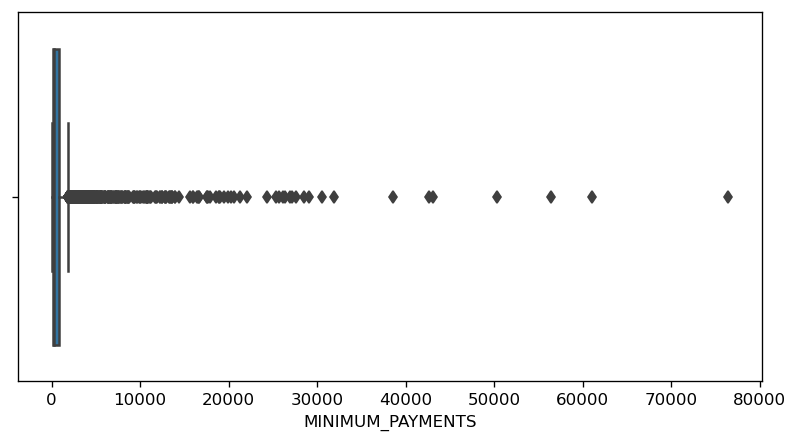

In [28]:
i = 14
plt.figure(figsize = (8,4), dpi = 120)
sns.boxplot(x = df.columns[i],data = df)
plt.show()

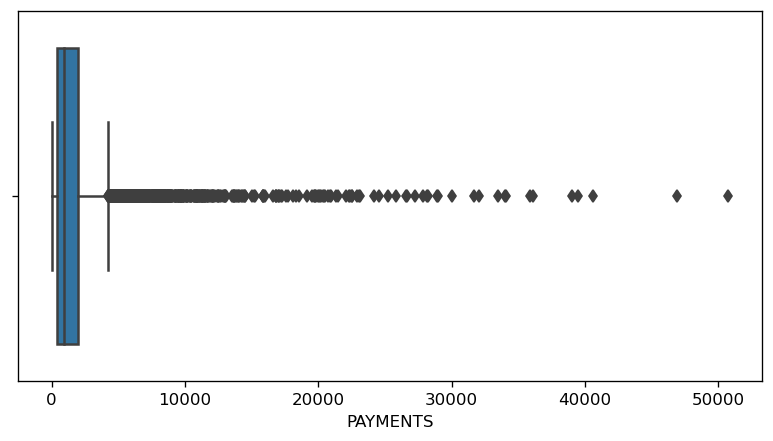

In [29]:
i = 13
plt.figure(figsize = (8,4), dpi = 120)
sns.boxplot(x = df.columns[i],data = df)
plt.show()

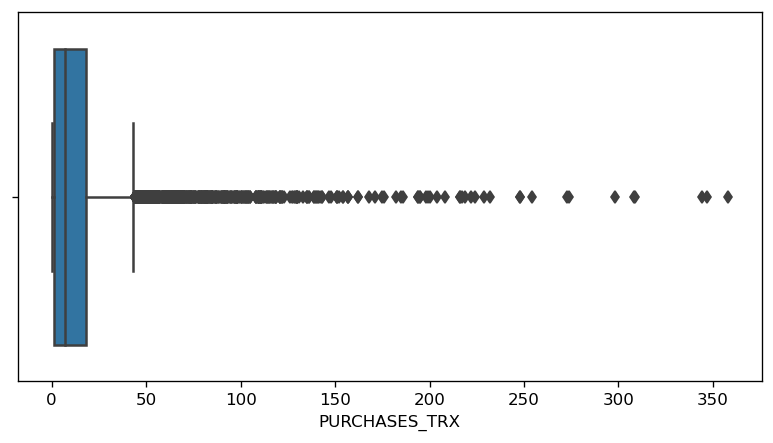

In [30]:
i = 11
plt.figure(figsize = (8,4), dpi = 120)
sns.boxplot(x = df.columns[i],data = df)
plt.show()

## Outliers of Each fearture: 

* BALANCE > 17500 
* BALANCE_FREQUENCY == 0 
* PURCHASES > 30000 
* ONEOFF_PURCHASES > 30000 
* INSTALLMENTS_PURCHASES > 20000 
* CASH_ADVANCE > 40000 
* CASH_ADVANCE_FREQUENCY > 1.4 
* CASH_ADVANCE_TRX > 80
* CREDIT_LIMIT >= 25000 
* PAYMENTS > 45000 
* MINIMUM_PAYMENT > 35000 

In [31]:
df['BALANCE'].nlargest(5)

122     19043.13856
3992    18495.55855
5309    16304.88925
6410    16259.44857
5107    16115.59640
Name: BALANCE, dtype: float64

<AxesSubplot:>

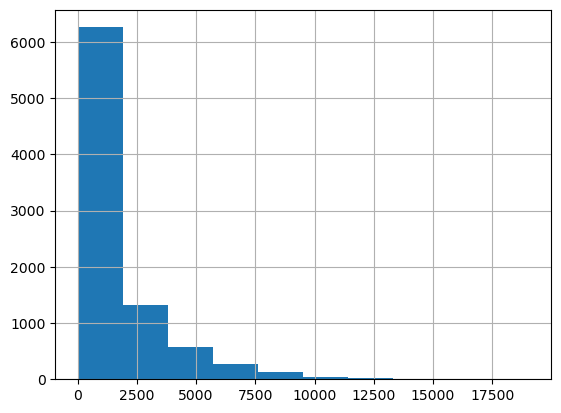

In [32]:
df['BALANCE'].hist(bins=10)

In [33]:
mask = df['BALANCE'] <= 17500
df[mask]['BALANCE'].describe()

count     8634.000000
mean      1597.248028
std       2079.451860
min          0.000000
25%        147.923961
50%        916.693628
75%       2100.631605
max      16304.889250
Name: BALANCE, dtype: float64

In [34]:
df['BALANCE'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

In [35]:
mask = df['BALANCE_FREQUENCY'] < 0.1
sum(mask)

31

In [36]:
df['BALANCE_FREQUENCY'].nsmallest(10)

1480    0.000000
4779    0.000000
6824    0.000000
7201    0.000000
7429    0.000000
7584    0.000000
181     0.090909
695     0.090909
723     0.090909
1014    0.090909
Name: BALANCE_FREQUENCY, dtype: float64

<AxesSubplot:>

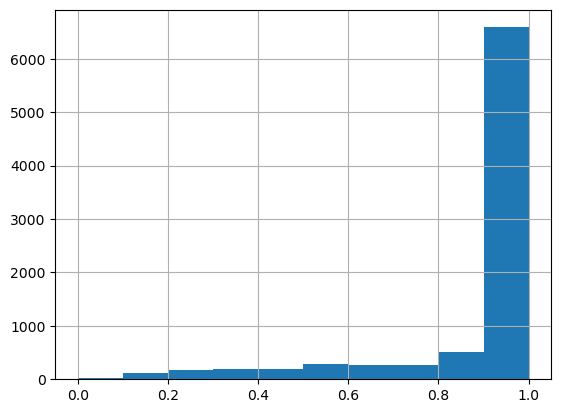

In [37]:
df['BALANCE_FREQUENCY'].hist(bins = 10)

In [38]:
mask = df['BALANCE_FREQUENCY'] ==0
df[mask == False]['BALANCE_FREQUENCY'].describe()

count    8630.000000
mean        0.895657
std         0.206423
min         0.090909
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [39]:
df['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [40]:
df['PURCHASES'].nlargest(5)

512     49039.57
464     41050.40
1166    40040.71
1509    38902.71
3792    35131.16
Name: PURCHASES, dtype: float64

<AxesSubplot:>

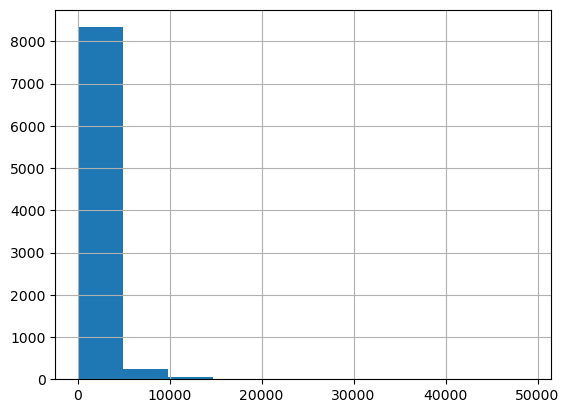

In [41]:
df['PURCHASES'].hist(bins = 10)

In [42]:
mask = df['PURCHASES'] > 30000
df[mask == False]['PURCHASES'].describe()

count     8629.000000
mean       995.207238
std       1883.487877
min          0.000000
25%         43.250000
50%        374.950000
75%       1141.240000
max      27957.680000
Name: PURCHASES, dtype: float64

In [43]:
df['ONEOFF_PURCHASES'].nlargest(8)


512     40761.25
464     40624.06
3792    34087.73
1509    33803.84
246     26547.43
6818    26514.32
1355    25122.77
1166    24543.52
Name: ONEOFF_PURCHASES, dtype: float64

<AxesSubplot:>

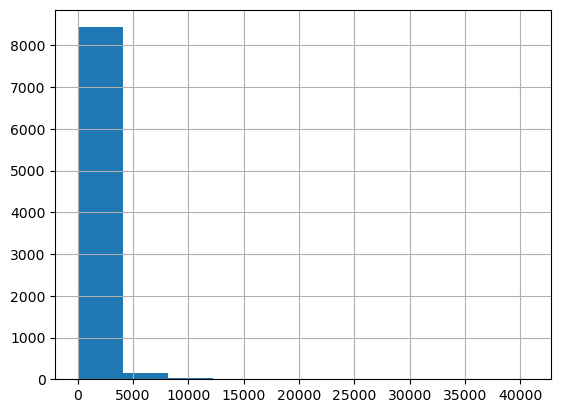

In [44]:
df['ONEOFF_PURCHASES'].hist(bins = 10)

In [45]:
mask=df['ONEOFF_PURCHASES'] > 30000
df[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
464   13479.288210                1.0   41050.40          40624.06   
512   11547.520010                1.0   49039.57          40761.25   
1509   3391.702180                1.0   38902.71          33803.84   
3792   2997.977825                1.0   35131.16          34087.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
464                   426.34      0.000000             0.833333   
512                  8278.32    558.166886             1.000000   
1509                 5098.87      0.000000             1.000000   
3792                 1043.43      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
464                     0.666667                          0.416667   
512                     1.000000                          0.916667   
1509                    1.000000                          1.000000   
3792                    1.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
464                 0.000000                 0            157       17000.0   
512                 0.083333                 1            101       22500.0   
1509                0.000000                 0            195       18000.0   
3792                0.000000                 0            344       12000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
464   36066.75068      15914.484620          0.083333      12  
512   46930.59824       2974.069421          0.250000      12  
1509  35843.62593        716.027656          1.000000      12  
3792  28896.66522        767.014180          0.750000      12

In [46]:
df['ONEOFF_PURCHASES'].describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [47]:
df[mask == False]['ONEOFF_PURCHASES'].describe()

count     8632.000000
mean       587.888316
std       1485.914085
min          0.000000
25%          0.000000
50%         44.850000
75%        598.037500
max      26547.430000
Name: ONEOFF_PURCHASES, dtype: float64

<AxesSubplot:>

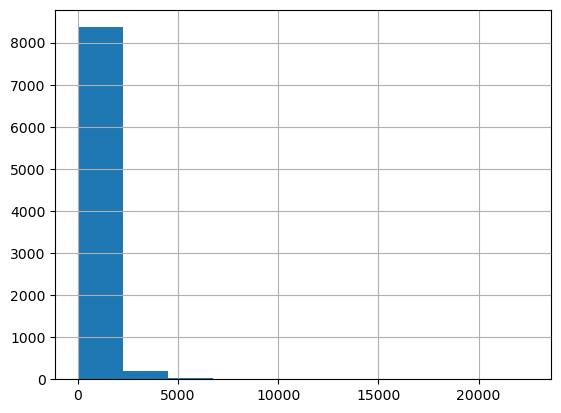

In [48]:
df['INSTALLMENTS_PURCHASES'].hist(bins=10)

In [49]:
mask = df['INSTALLMENTS_PURCHASES'] < 20000
df[mask]['INSTALLMENTS_PURCHASES'].describe()

count     8635.000000
mean       418.286595
std        885.984236
min          0.000000
25%          0.000000
50%         94.710000
75%        483.680000
max      15497.190000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [50]:
df.sort_values(by = 'INSTALLMENTS_PURCHASES',ascending = False).head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5086  4060.710208           0.727273    22500.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5086                 22500.0           0.0                  0.5   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5086                         0.0                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5086                     0.0                 0             12       23000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5086  8760.860264       1645.535202               0.0      12

<AxesSubplot:>

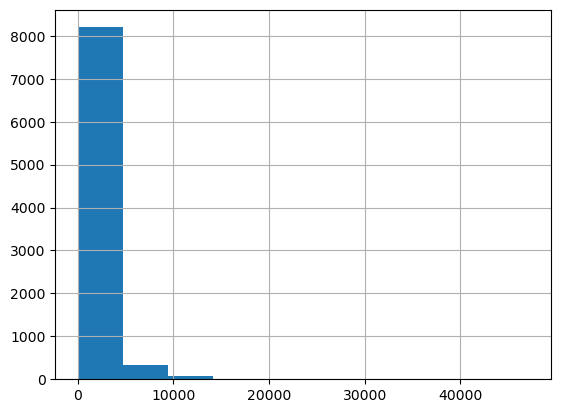

In [51]:
df['CASH_ADVANCE'].hist(bins=10)

In [52]:
df['CASH_ADVANCE'].nlargest(5)

2054    47137.21176
977     29282.10915
64      27296.48576
7022    26268.69989
7402    26194.04954
Name: CASH_ADVANCE, dtype: float64

In [53]:
df['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [54]:
mask = df['CASH_ADVANCE'] < 45000
df[mask]['CASH_ADVANCE'].describe()

count     8635.000000
mean       988.831801
std       2062.637616
min          0.000000
25%          0.000000
50%          0.000000
75%       1131.895249
max      29282.109150
Name: CASH_ADVANCE, dtype: float64

In [55]:
df.iloc[2054]

BALANCE                             10905.053810
BALANCE_FREQUENCY                       1.000000
PURCHASES                             431.930000
ONEOFF_PURCHASES                      133.500000
INSTALLMENTS_PURCHASES                298.430000
CASH_ADVANCE                        47137.211760
PURCHASES_FREQUENCY                     0.583333
ONEOFF_PURCHASES_FREQUENCY              0.250000
PURCHASES_INSTALLMENTS_FREQUENCY        0.500000
CASH_ADVANCE_FREQUENCY                  1.000000
CASH_ADVANCE_TRX                      123.000000
PURCHASES_TRX                          21.000000
CREDIT_LIMIT                        19600.000000
PAYMENTS                            39048.597620
MINIMUM_PAYMENTS                     5394.173671
PRC_FULL_PAYMENT                        0.000000
TENURE                                 12.000000
Name: 2054, dtype: float64

In [56]:
df['CASH_ADVANCE_FREQUENCY'].nlargest(5)

2919    1.500000
640     1.250000
1530    1.166667
3129    1.166667
8086    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

<AxesSubplot:>

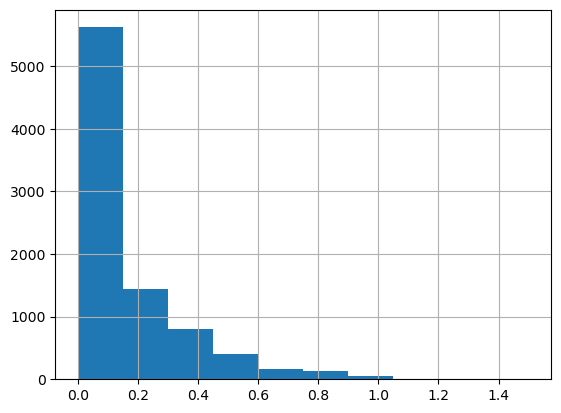

In [57]:
df['CASH_ADVANCE_FREQUENCY'].hist(bins=10)

CASH_ADVANCE: The only outlier in this columns is for away from other camples, and it has a significant effect on the statistic. 

In [58]:
df['CASH_ADVANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.137604
std         0.201791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [59]:
df['CASH_ADVANCE_TRX'].nlargest(10)

504     123
2054    123
8039    123
3417    110
1812    107
5113     93
5145     80
4951     71
7402     69
3137     63
Name: CASH_ADVANCE_TRX, dtype: int64

In [60]:
df.iloc[[504,2054,8039,3417,1812,5113]]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
504    1284.633140           1.000000      55.50              0.00   
2054  10905.053810           1.000000     431.93            133.50   
8039   2648.244646           1.000000       0.00              0.00   
3417   4175.826879           1.000000       0.00              0.00   
1812   1856.325339           0.818182     670.50            516.90   
5113   7268.706380           1.000000     306.91            306.91   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
504                    55.50   5406.459348             0.083333   
2054                  298.43  47137.211760             0.583333   
8039                    0.00  10458.978150             0.000000   
3417                    0.00   9968.184827             0.000000   
1812                  153.60   5603.126858             0.545455   
5113                    0.00  12702.427700             0.272727   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
504                     0.000000                          0.083333   
2054                    0.250000                          0.500000   
8039                    0.000000                          0.000000   
3417                    0.000000                          0.000000   
1812                    0.272727                          0.363636   
5113                    0.272727                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
504                 0.833333               123              1        3000.0   
2054                1.000000               123             21       19600.0   
8039                1.000000               123              0        4000.0   
3417                0.909091               110              0       10500.0   
1812                0.727273               107              9        7000.0   
5113                1.000000                93              4       12000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
504    3432.757202        421.385587          0.000000      12  
2054  39048.597620       5394.173671          0.000000      12  
8039   9818.531412        665.888853          0.000000      12  
3417   1083.433387       1000.206323          0.000000      11  
1812   9221.922948        537.180986          0.142857      11  
5113   3512.633784       2096.962594          0.000000      11

<AxesSubplot:>

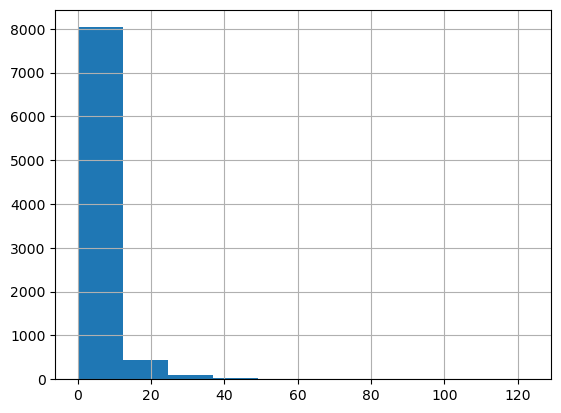

In [61]:
df['CASH_ADVANCE_TRX'].hist(bins=10)

In [62]:
df['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [63]:
mask = df['CASH_ADVANCE_TRX'] <= 80
df[mask]['CASH_ADVANCE_TRX'].describe()

count    8630.000000
mean        3.237543
std         6.271590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        80.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [64]:
df['CREDIT_LIMIT'].nlargest()

4747    30000.0
6818    30000.0
900     28000.0
3527    25000.0
176     23000.0
Name: CREDIT_LIMIT, dtype: float64

<AxesSubplot:>

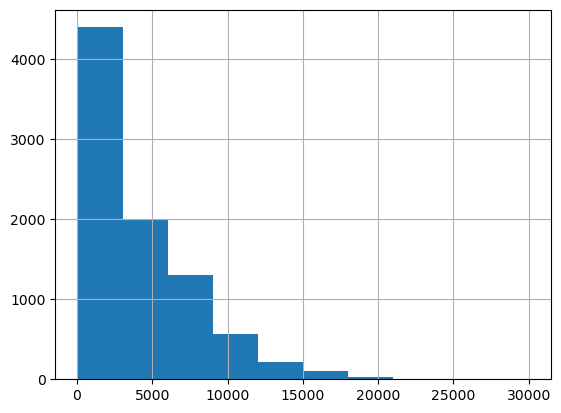

In [65]:
df['CREDIT_LIMIT'].hist(bins=10)

In [66]:
mask = df['CREDIT_LIMIT'] <= 25000
df[mask]['CREDIT_LIMIT'].describe()

count     8633.000000
mean      4513.469029
std       3630.476992
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      25000.000000
Name: CREDIT_LIMIT, dtype: float64

CREDIT_LIMIT : Altough the boxplot shows some outliers, but the distance between the potential outliers and the rest of the samples is not far.


In [67]:
df['PAYMENTS'].nlargest(5)

4072    50721.48336
512     46930.59824
4514    40627.59524
5183    39461.96580
2054    39048.59762
Name: PAYMENTS, dtype: float64

In [68]:
df.iloc[[4072,512,4514,5183,2054]]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4072   1268.809031           0.272727   17945.00          17945.00   
512   11547.520010           1.000000   49039.57          40761.25   
4514   8248.178009           1.000000    1788.84              0.00   
5183   6372.182817           1.000000   22101.78          22101.78   
2054  10905.053810           1.000000     431.93            133.50   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4072                    0.00      0.000000             0.166667   
512                  8278.32    558.166886             1.000000   
4514                 1788.84     90.031207             1.000000   
5183                    0.00  19513.474830             0.333333   
2054                  298.43  47137.211760             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4072                    0.166667                          0.000000   
512                     1.000000                          0.916667   
4514                    0.000000                          1.000000   
5183                    0.333333                          0.000000   
2054                    0.250000                          0.500000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4072                0.000000                 0              3       18000.0   
512                 0.083333                 1            101       22500.0   
4514                0.083333                 1             12       18000.0   
5183                0.666667                35             40        7500.0   
2054                1.000000               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4072  50721.48336       1149.747342          0.000000      12  
512   46930.59824       2974.069421          0.250000      12  
4514  40627.59524       2149.990102          0.166667      12  
5183  39461.96580       6764.853481          0.250000      12  
2054  39048.59762       5394.173671          0.000000      12

<AxesSubplot:>

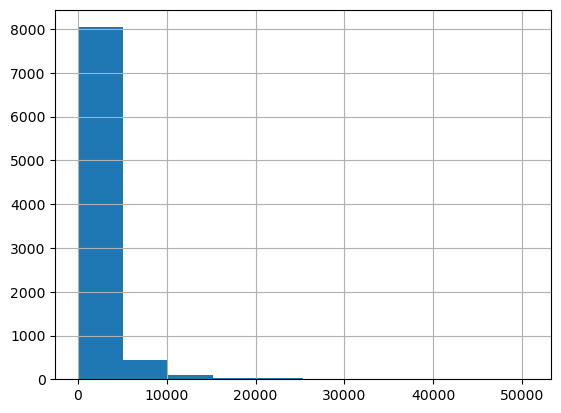

In [69]:
df['PAYMENTS'].hist(bins=10)

In [70]:
df['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

In [71]:
mask = df['PAYMENTS'] > 45000
df[mask]['PAYMENTS'].describe()

count        2.000000
mean     48826.040800
std       2680.560575
min      46930.598240
25%      47878.319520
50%      48826.040800
75%      49773.762080
max      50721.483360
Name: PAYMENTS, dtype: float64

<AxesSubplot:>

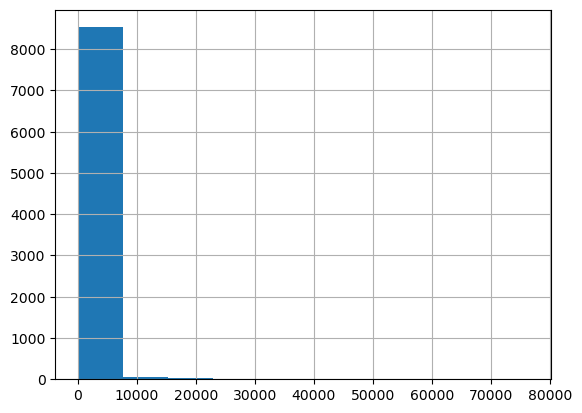

In [72]:
df['MINIMUM_PAYMENTS'].hist(bins=10)

In [73]:
df['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [74]:
mask = df['MINIMUM_PAYMENTS'] > 35000
df[mask]['MINIMUM_PAYMENTS'].describe()

count        7.000000
mean     52620.432990
std      13197.331523
min      38512.124770
25%      42881.139700
50%      50260.759470
75%      58700.829885
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [75]:
df['MINIMUM_PAYMENTS'].nlargest(5)

4226    76406.20752
6902    61031.61860
5474    56370.04117
4311    50260.75947
5640    43132.72823
Name: MINIMUM_PAYMENTS, dtype: float64

In [76]:
df.iloc[[4226,6902,5474,4311,5640]]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4226  10571.411070                1.0    7739.48               0.0   
6902   9024.812044                1.0       0.00               0.0   
5474   4628.109931                1.0     912.54               0.0   
4311   4976.028578                1.0     900.87               0.0   
5640   8038.893195                1.0       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4226                 7739.48      0.000000                  1.0   
6902                    0.00   2750.442399                  0.0   
5474                  912.54      0.000000                  1.0   
4311                  900.87      0.000000                  1.0   
5640                    0.00    197.915586                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4226                         0.0                               1.0   
6902                         0.0                               0.0   
5474                         0.0                               1.0   
4311                         0.0                               1.0   
5640                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4226                0.000000                 0             44        8000.0   
6902                0.083333                 2              0        9000.0   
5474                0.000000                 0             21        5000.0   
4311                0.000000                 0            162        5500.0   
5640                0.166667                 8              0        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4226  2688.447014       76406.20752               0.0      12  
6902   302.484224       61031.61860               0.0      12  
5474  3746.305759       56370.04117               0.0      12  
4311    92.865469       50260.75947               0.0      12  
5640  3569.182969       43132.72823               0.0      12

In [77]:
df_1 = df.drop([246,464,512,1166,1509,1545,3792,5086,2054,504,8039,3417,1812,5113,4072,4226,6902,5474,4311])
df_1.reset_index(drop = True, inplace=True)
df_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8612     5.871712           0.500000      20.90             20.90   
8613    28.493517           1.000000     291.12              0.00   
8614    23.398673           0.833333     144.40              0.00   
8615    13.457564           0.833333       0.00              0.00   
8616   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8612                    0.00      0.000000             0.166667   
8613                  291.12      0.000000             1.000000   
8614                  144.40      0.000000             0.833333   
8615                    0.00     36.558778             0.000000   
8616                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8612                    0.166667                          0.000000   
8613                    0.000000                          0.833333   
8614                    0.000000                          0.666667   
8615                    0.000000                          0.000000   
8616                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8612                0.000000                 0              1         500.0   
8613                0.000000                 0              6        1000.0   
8614                0.000000                 0              5        1000.0   
8615                0.166667                 2              0         500.0   
8616                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8612    58.644883         43.473717          0.000000       6  
8613   325.594462         48.886365          0.500000       6  
8614    81

# In-Depth Visual Analysis

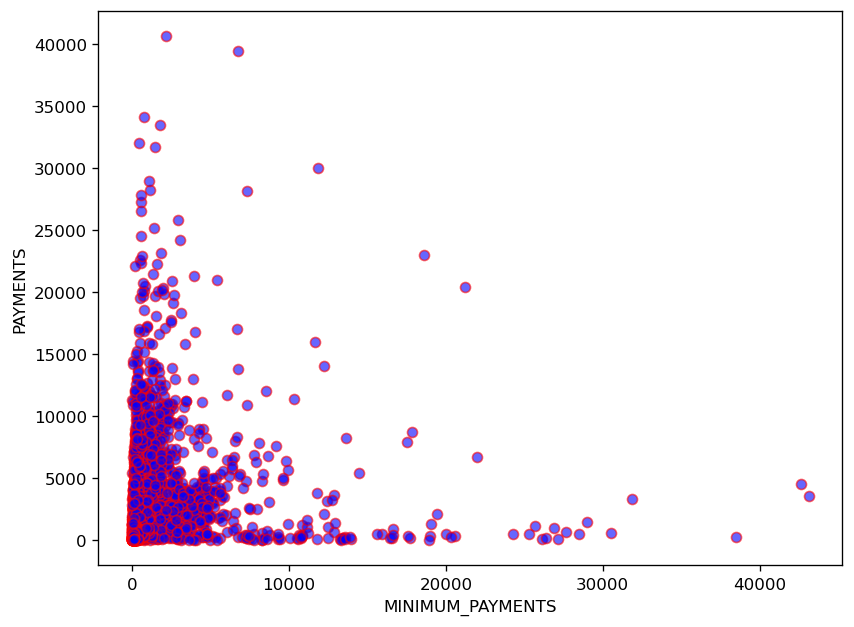

In [78]:
# In order to check for remaining outliers, of_1 is being used instead of the original data.

try:
    #x = int(input('feature No:'))
    #y = int(input('feature No:'))
    x, y =14,13
    feature_1, feature_2 = df.columns[x],df.columns[y]
    plt.figure(figsize =(8,6),dpi=120)
    plt.scatter(df_1[feature_1],df_1[feature_2],color='blue', edgecolors='red', alpha=0.6)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
except:
    print('Invalid Number')

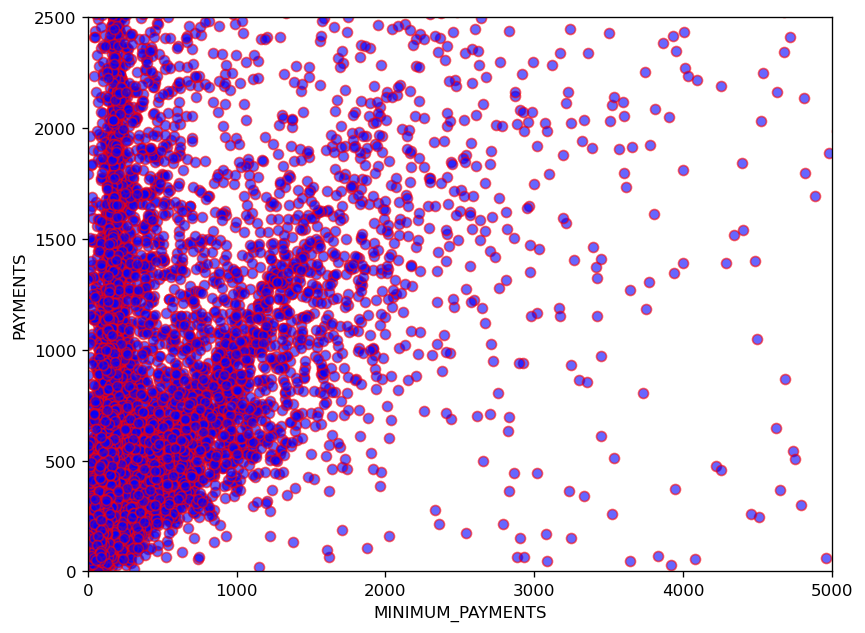

In [79]:
plt.figure(figsize = (8,6),dpi = 120)
plt.scatter(df_1[feature_1],df_1[feature_2], color = 'blue',edgecolors = 'red', alpha = 0.6)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.xlim(0,5000)
plt.ylim(0,2500)
plt.show()


`Analyzing scatter plots has shown that the data still contains some outliers in 20 space`

* Remining ouutliers

* Largest value of BALANCE

* BALANCE > 10000, PURCHASES_TRX > 250

* PURCHASES > 20000, CASH_ADVANCE > 18000

* PURCHASES > 20000, CASH_ADVANCE_TRX > 30

* PURCHASES > 25000, CREDIT_LIMIT > 25000

* PURCHASES > 20000, PAYMENTS > 35000

* ONEOFF_PURCHASES > 20000, CASH_ADVANCE_FREQUENCY > 0.6

* ONEOFF_PURCHASES > 25000, CREDIT_LIMIT > 25000

* INSTALLMENTS_PURCHASES > 8000, CASH_ADVANCE > 14500

* INSTALLMENTS_PURCHASES > 12000, PURCHASES_FREQUENCY < 0.4

* INSTALLMENTS_PURCHASES > 12000, PURCHASES_INSTALLMENTS_FREQUENCY < 0.2

* CASH_ADVANCE > 25000, 0.6 < PURCHASES_FREQUENCY < 0.8

* CASH_ADVANCE > 14000, PURCHASES_TRX > 300

* PURCHASES_FREQUENCY < 0.4, PURCHASES_TRX > 150

* PURCHASES_FREQUENCY < 0.8, PURCHASES_TRX > 300

* largest value of CASH_ADVANCE_FREQUENCY

* CASH_ADVANCE_TRX > 40, PURCHASES_TRX > 300

* Indices of the outliers : 122, 2698, 3050, 5167, 896, 6801, 4350, 1605, 64, 7467, 4614, 2910

In [80]:
df_2 = df_1.drop([122, 2690,3050,5167,896,6801,4350,1605,64,7467,4614,2910])
df_2.reset_index(drop = True, inplace = True)
df_2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8600     5.871712           0.500000      20.90             20.90   
8601    28.493517           1.000000     291.12              0.00   
8602    23.398673           0.833333     144.40              0.00   
8603    13.457564           0.833333       0.00              0.00   
8604   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8600                    0.00      0.000000             0.166667   
8601                  291.12      0.000000             1.000000   
8602                  144.40      0.000000             0.833333   
8603                    0.00     36.558778             0.000000   
8604                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8600                    0.166667                          0.000000   
8601                    0.000000                          0.833333   
8602                    0.000000                          0.666667   
8603                    0.000000                          0.000000   
8604                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8600                0.000000                 0              1         500.0   
8601                0.000000                 0              6        1000.0   
8602                0.000000                 0              5        1000.0   
8603                0.166667                 2              0         500.0   
8604                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8600    58.644883         43.473717          0.000000       6  
8601   325.594462         48.886365          0.500000       6  
8602    81

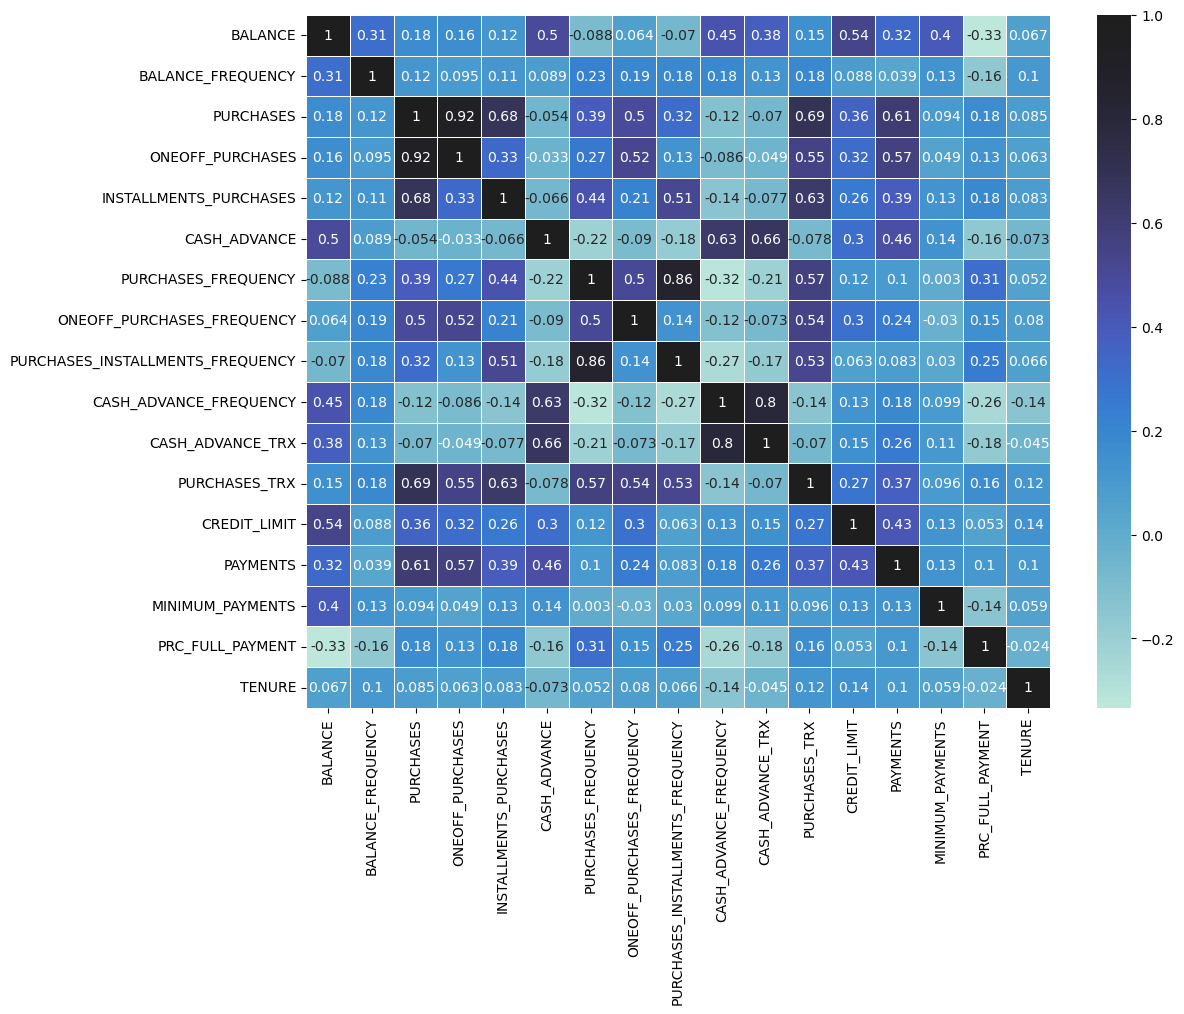

In [81]:
fig, ax = plt.subplots(figsize = (12,9), dpi = 100)
sns.heatmap(df.corr(), center = 1, cbar =True, annot =True, linewidths = 0.5, ax=ax)
plt.show()

* Analysing the `correlation` between feature, these are  some pair of feature with high correlation that might not be a good thing for modeling. These pairs are `ONEOFF_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` and `PURCHASES_FREQUENCY`,`CASH_ADVANCE_TRX` and `CASH_ADVANCE_FREQUENCY`.


* Inspecting all the plots above, a good feature to be used as the key feature for plotting and comeparison purporses, is `BALANCE`. Reasons for this choice is that this feature is not discrete. Also, based on the kdeplot, values of the feature are more varied in comparison with other continuous feature in addition, this columns is correlated with others to a good extent.  

# Modeling

#### K-Means Algorithm

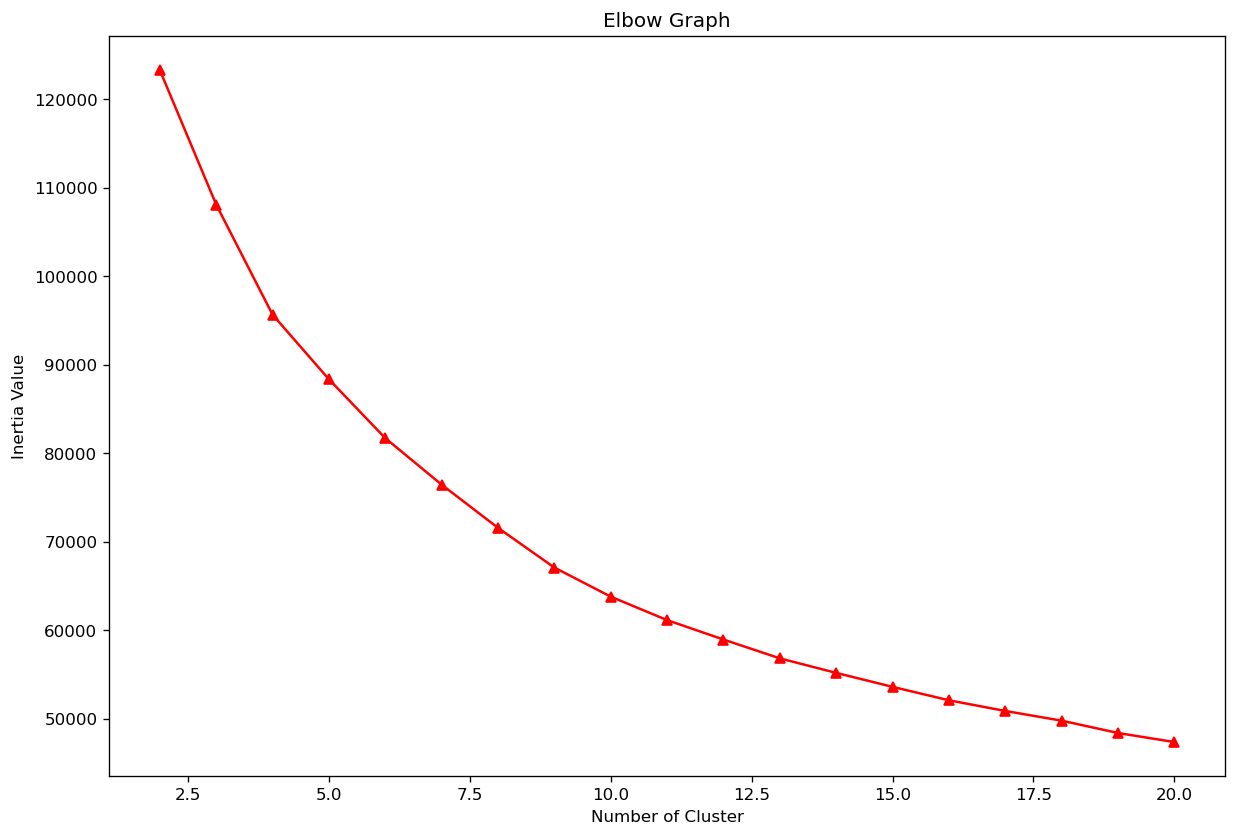

In [82]:
kmeans_constants = {'n_init': 100, 'random_state' : 1}
inertia_values = []

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    inertia_values.append(model.inertia_)
    
plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [83]:
kl= KneeLocator(range(2,21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

9

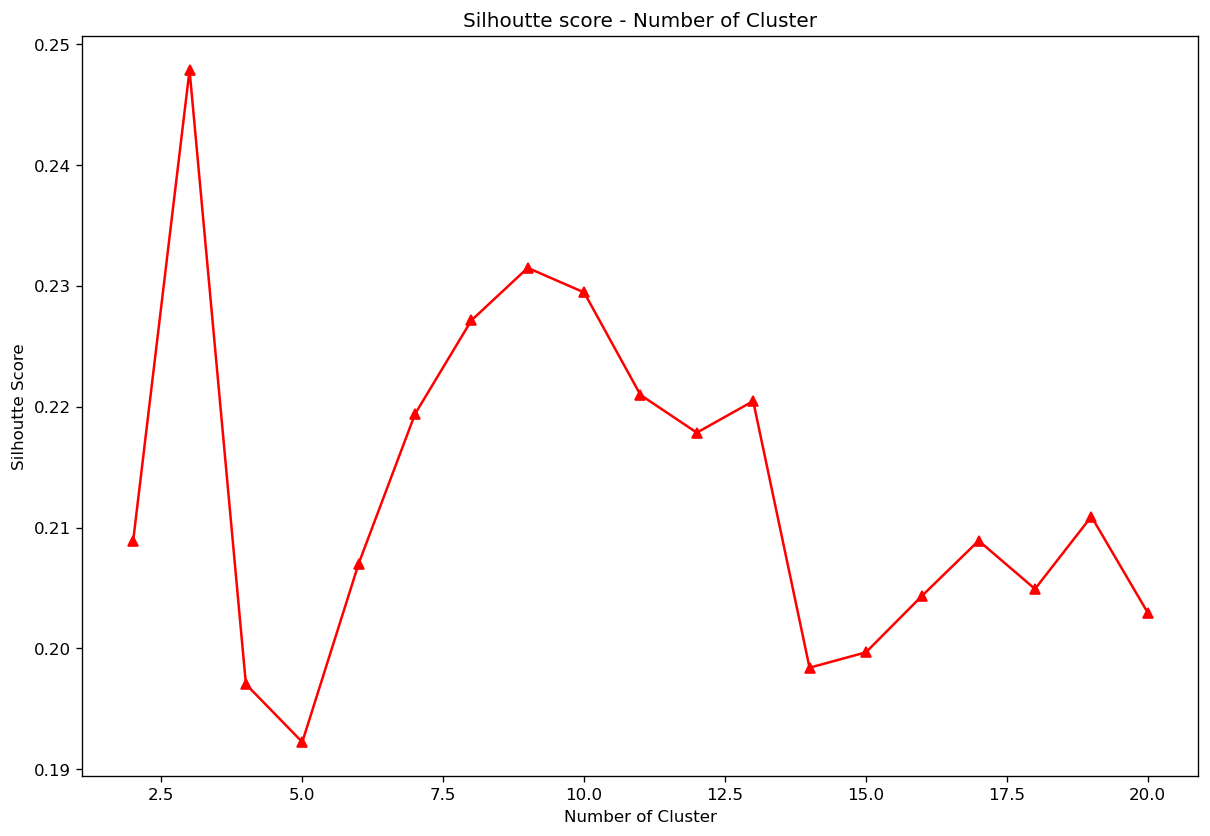

In [84]:
silhoutte_coefs = []

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df)
    model=KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    silhoutte_coefs.append(metrics.silhouette_score(x,model.labels_))

plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte score - Number of Cluster')
plt.show()

Based on the `silhouette` score, 3 `clusters` is the best choice.Considering that silhouette is a better indicator than elbow graph, we will continue with `3 cluster`.


In [85]:
scaler = StandardScaler()
x = scaler.fit_transform(df)
model = KMeans(n_clusters = 3,**kmeans_constants)
model.fit(x)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [86]:
centroids = scaler.inverse_transform(model.cluster_centers_)
centroids = pd.DataFrame(centroids,columns = df.columns)
centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   830.109738           0.859752   518.778707        260.058181   
1  2236.823143           0.982236  4301.224269       2733.266623   
2  4021.236938           0.960446   386.732634        249.118674   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              259.054818    334.274826             0.471529   
1             1568.453105    465.763191             0.950768   
2              137.693593   3901.351456             0.233908   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.135693                          0.349176   
1                    0.667714                          0.749913   
2                    0.111293                          0.145929   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.069987          1.236376       8.855756   3269.094616   
1                0.064056          1.554088      57.023947   7774.772915   
2                0.450620         12.541533       5.647135   6723.377042   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   951.530123        540.380318          0.163849  11.502214  
1  4183.209240       1239.012170          0.299224  11.921552  
2  3063.426653       1796.896664          0.033009  11.354153

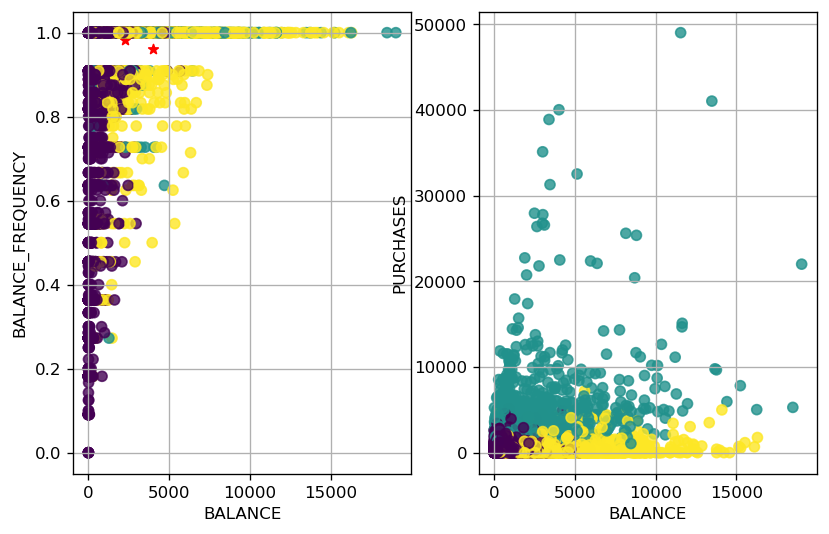

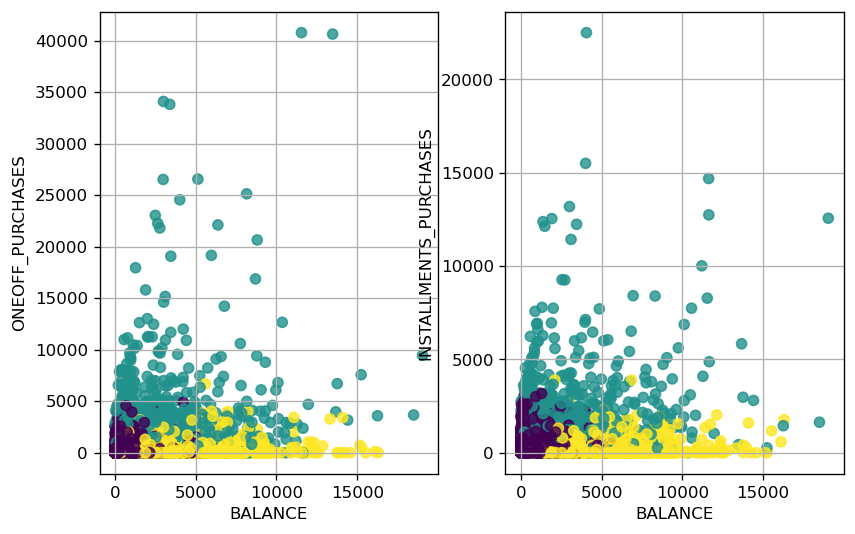

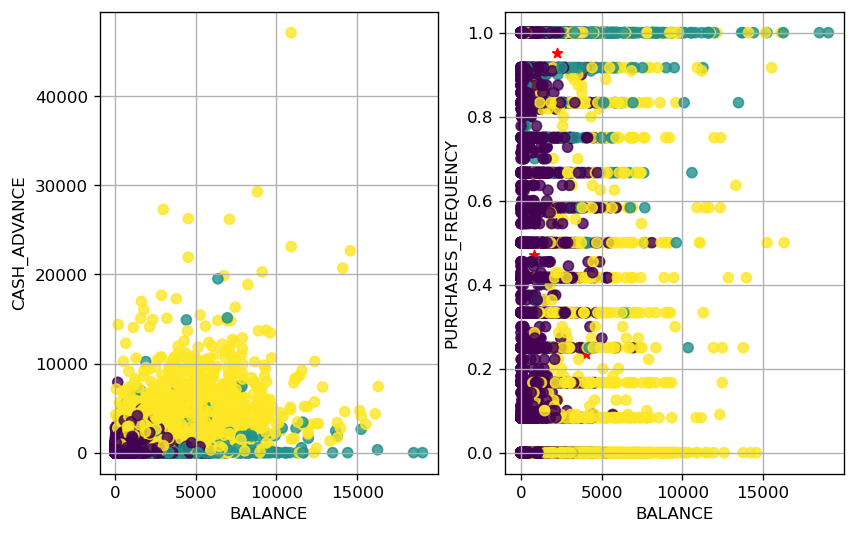

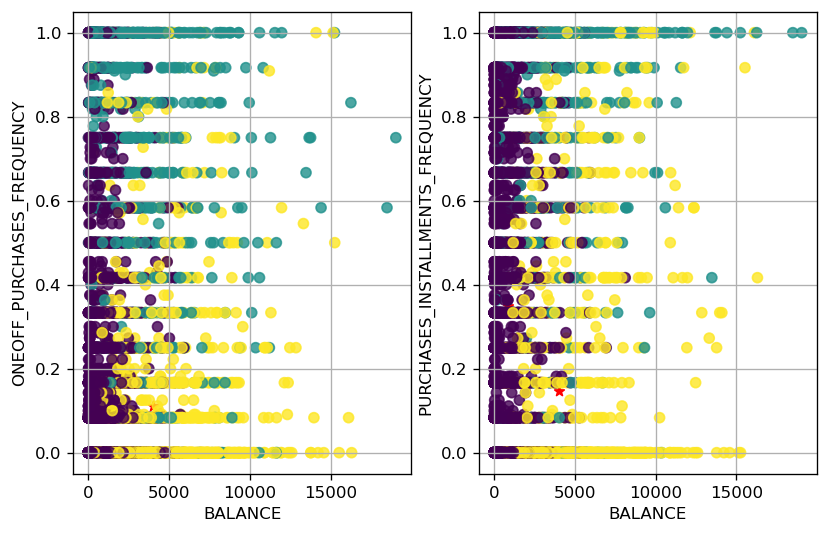

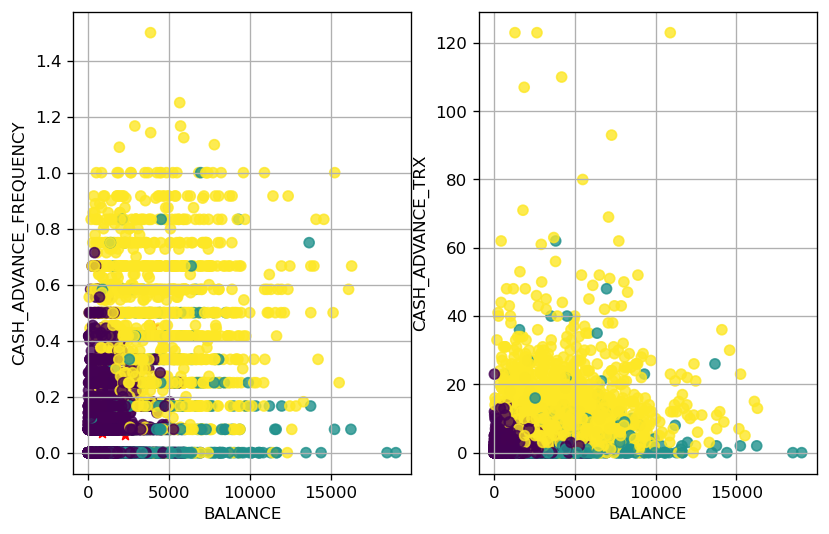

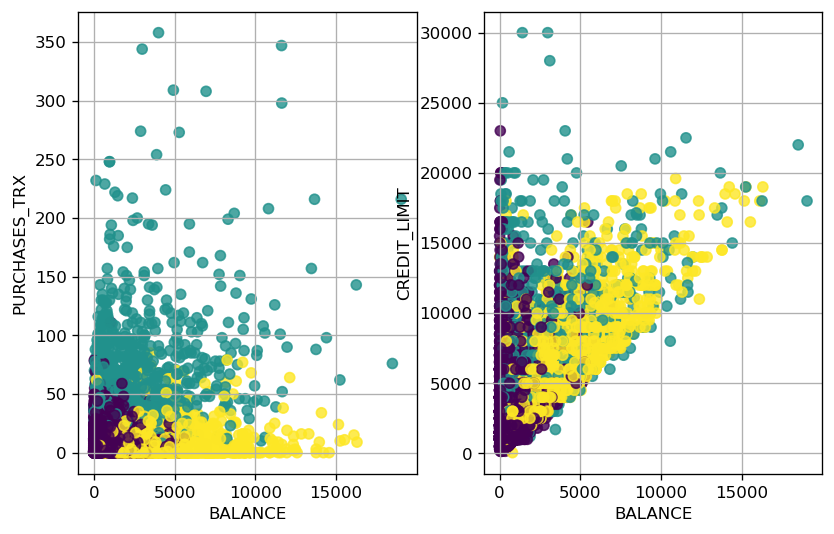

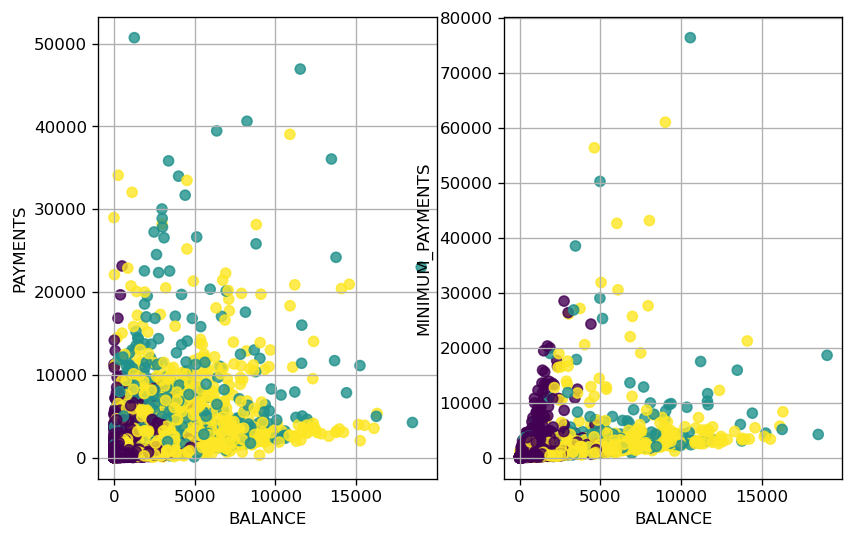

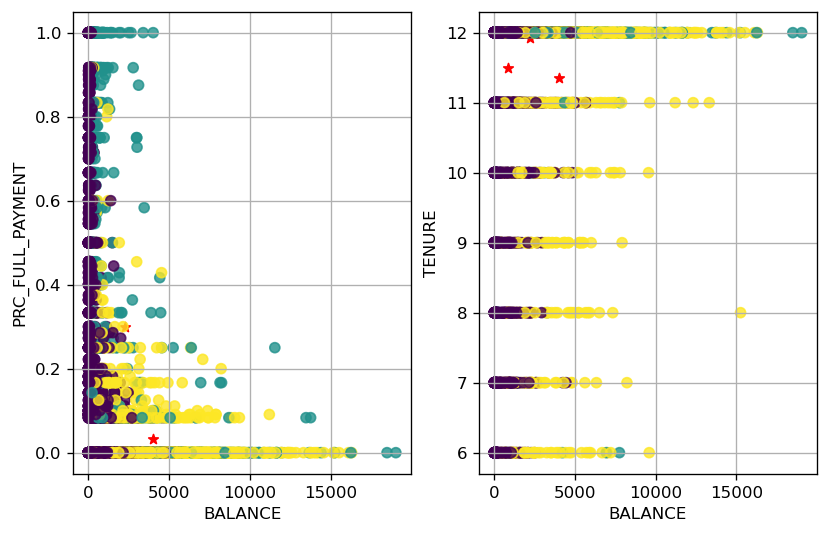

In [87]:
plt.style.use('default')
i = 1
while i < len(df.columns):
    try:
        fig = plt.figure(figsize =(8,5),dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'],centroids[df.columns[i]], marker = '*', c = 'r')
        plt.scatter(df['BALANCE'],df[df.columns[i]],
                   c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'],centroids[df.columns[i]], marker = '*', c = 'r')
        plt.scatter(df['BALANCE'],df[df.columns[i]],
                      c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [88]:
print('Inertia:', model.inertia_)
print('Silhouette Score:',metrics.silhouette_score(x,model.labels_))
print('CM Score:', metrics.calinski_harabasz_score(x,model.labels_))
print('DB Score:',metrics.davies_bouldin_score(x,model.labels_))

Inertia: 108086.19316841773
Silhouette Score: 0.24786629890647918
CM Score: 1546.543411545993
DB Score: 1.6016321310307227


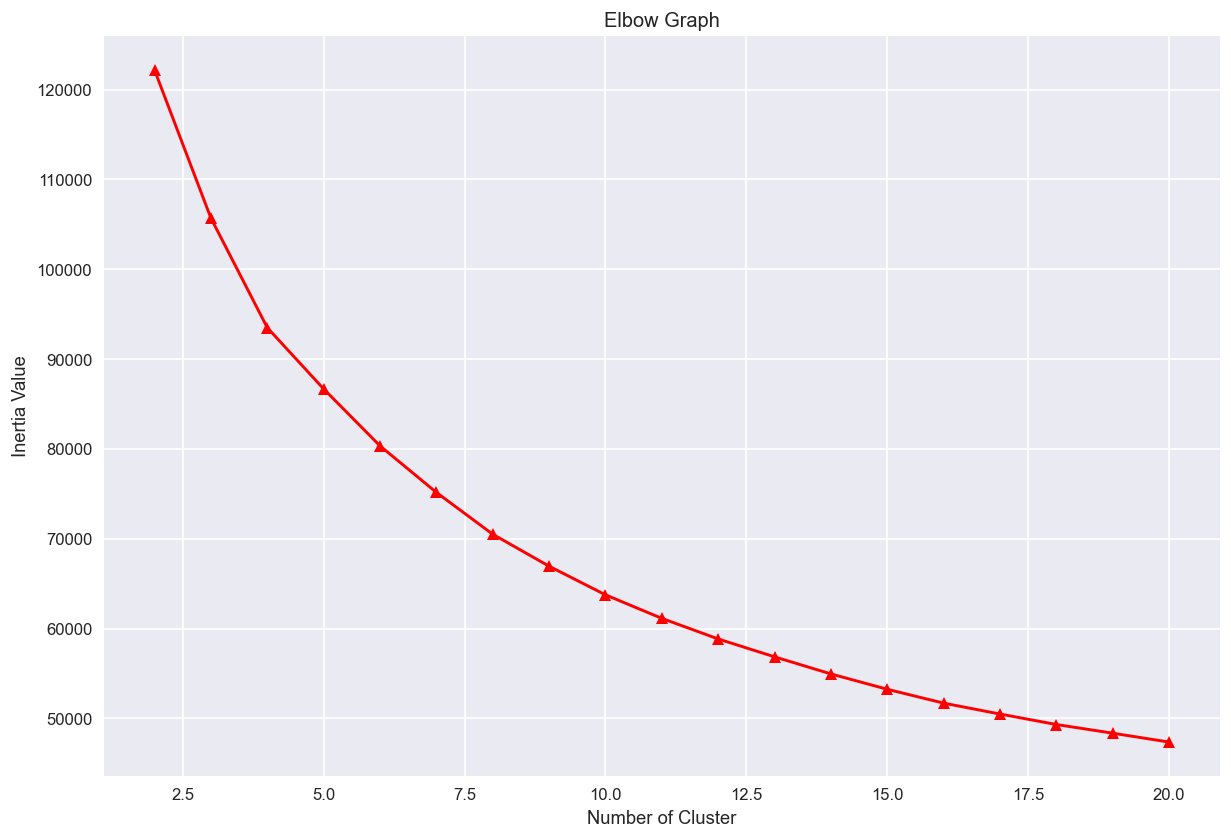

In [89]:
inertia_values =[]

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df_1)
    model=KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    inertia_values.append(model.inertia_)

plt.style.use('seaborn') 
plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [90]:
kl= KneeLocator(range(2,21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

8

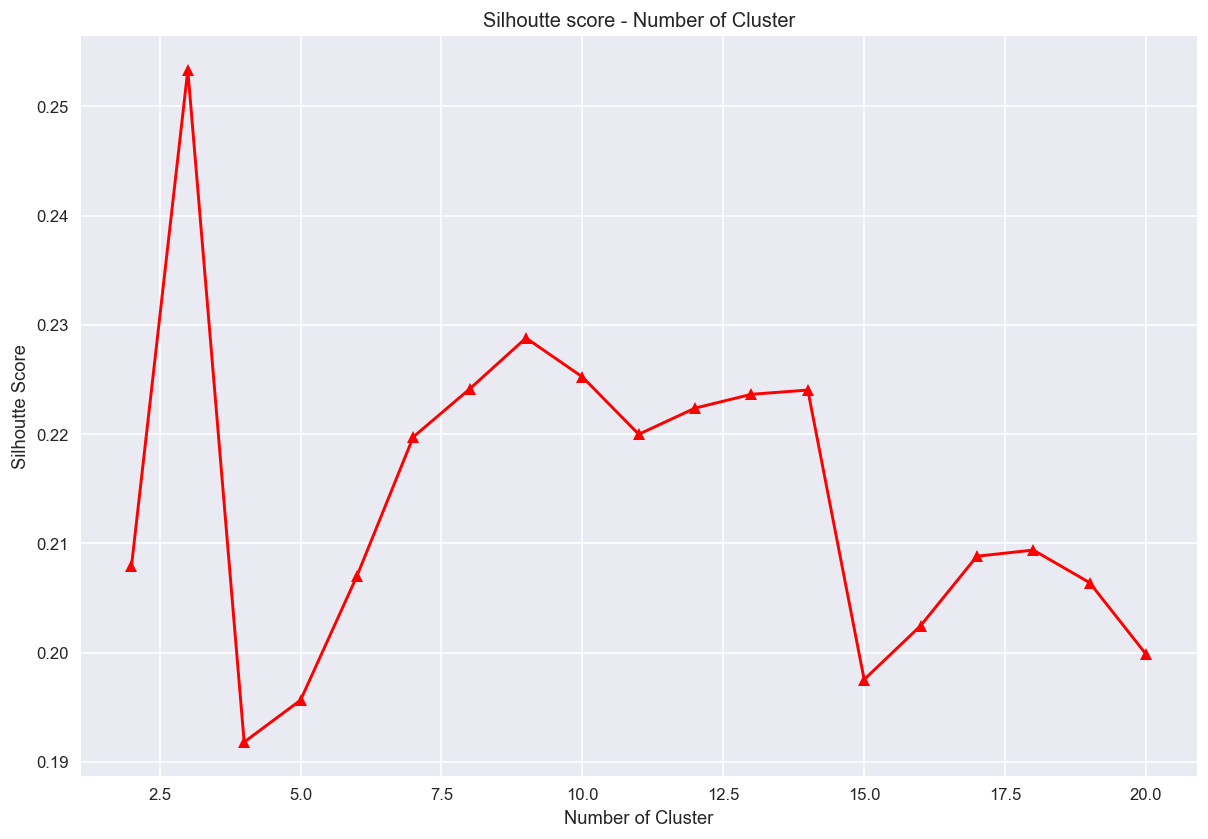

In [91]:
silhoutte_coefs = []

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df_1)
    model=KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    silhoutte_coefs.append(metrics.silhouette_score(x,model.labels_))

plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte score - Number of Cluster')
plt.show()

In [92]:
scaler = StandardScaler()
x = scaler.fit_transform(df_1)
model = KMeans(n_clusters = 3,**kmeans_constants)
model.fit(x)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [93]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_),columns = df_1.columns)

In [94]:
centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   833.158556           0.859913   507.640156        250.397435   
1  2182.593195           0.982114  4084.176051       2584.515550   
2  3999.647445           0.958809   381.993478        240.677860   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              257.578154    333.304813             0.470866   
1             1500.153112    472.338880             0.944058   
2              141.395559   3856.048025             0.236653   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.134797                          0.349397   
1                    0.665930                          0.738548   
2                    0.110536                          0.149026   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.070218          1.233766       8.818694   3275.960968   
1                0.064242          1.559113      55.619048   7646.182266   
2                0.448319         12.164189       5.704590   6682.420521   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   938.908848        519.803062          0.162691  11.500171  
1  3969.061747       1068.226115          0.300536  11.918719  
2  3050.150908       1835.767027          0.034734  11.357466

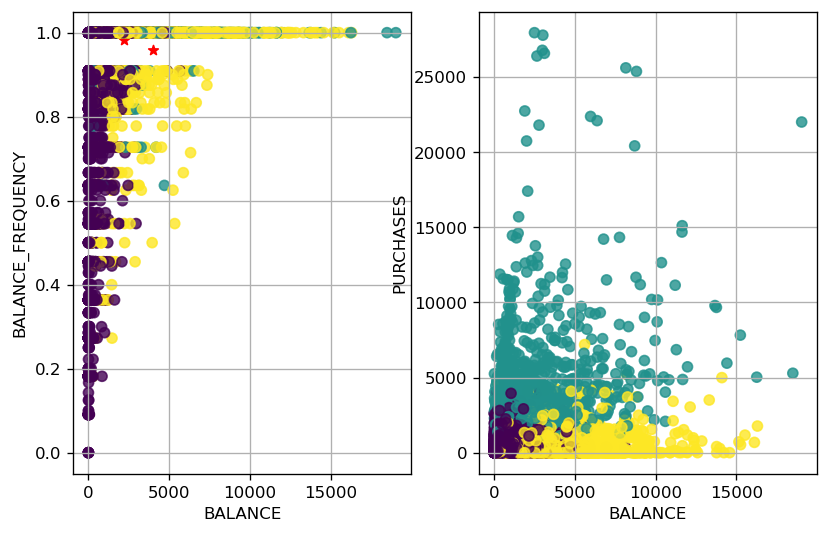

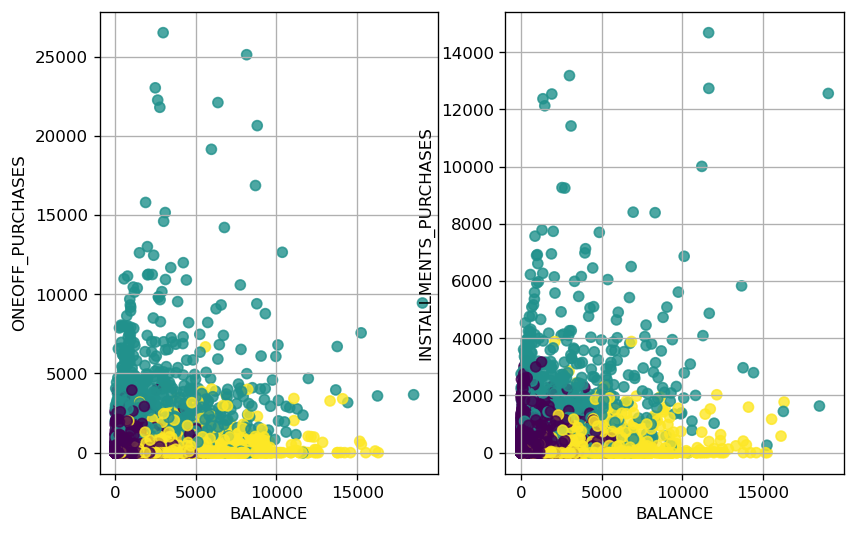

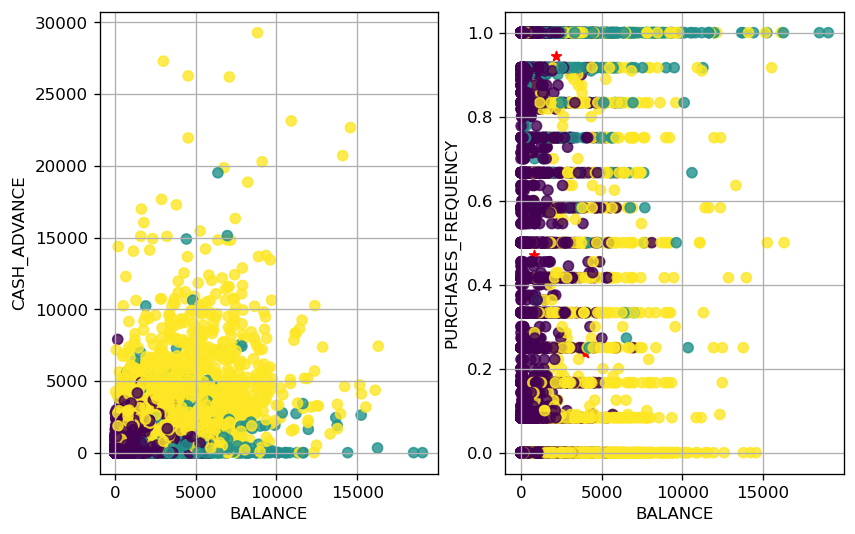

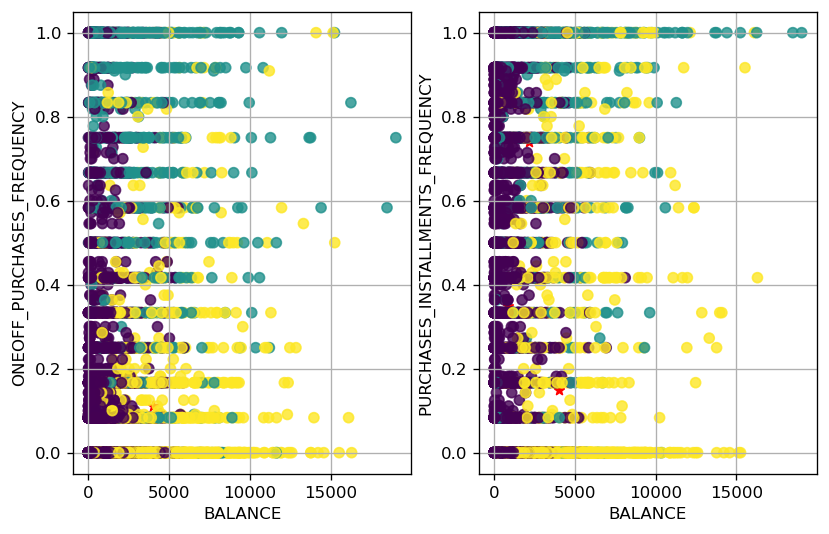

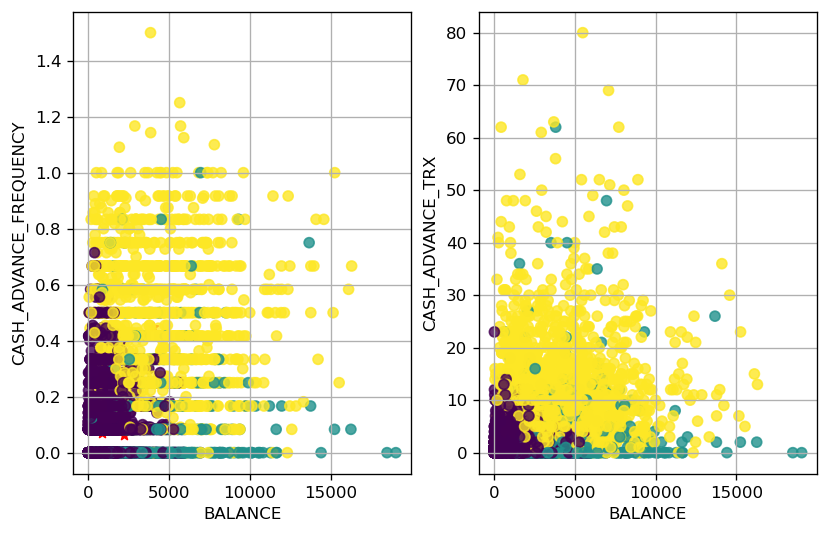

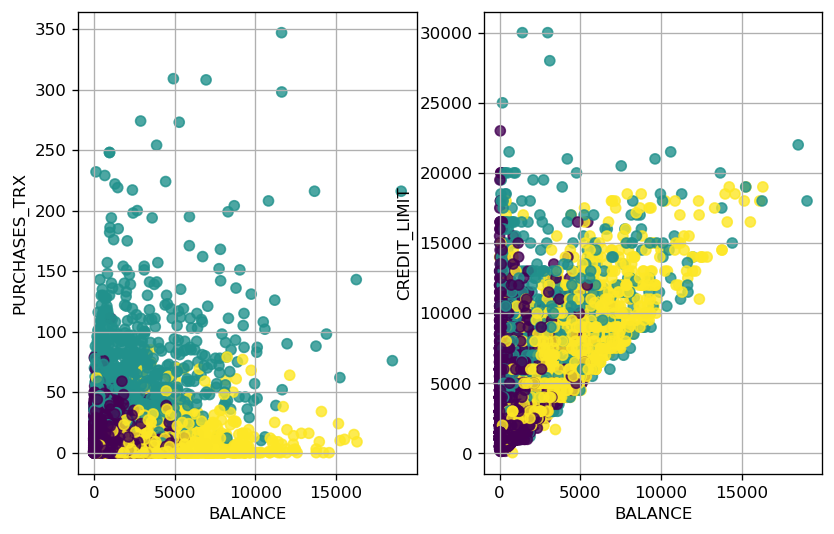

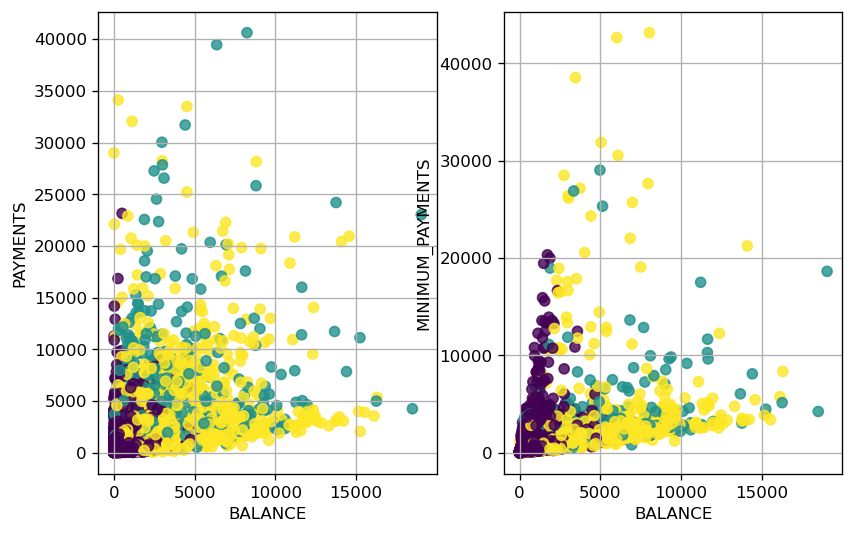

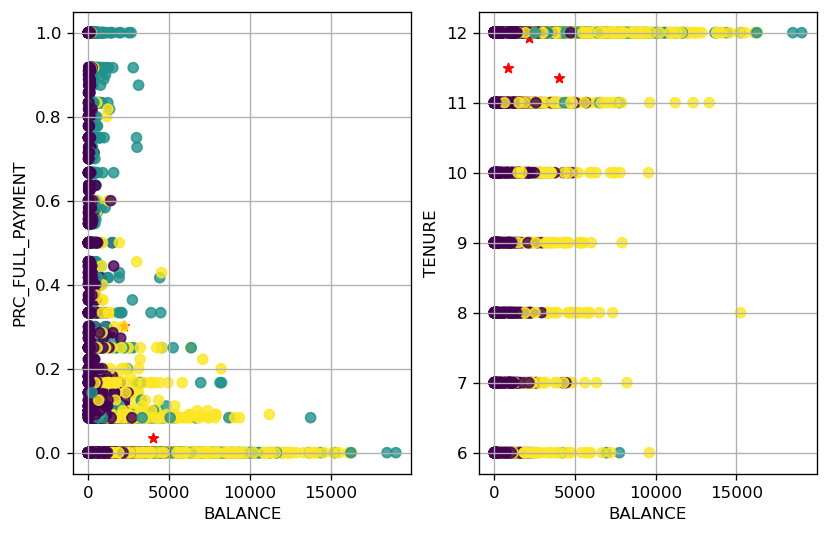

In [95]:
plt.style.use('default')
i = 1
while i < len(df.columns):
    try:
        fig = plt.figure(figsize =(8,5),dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'],centroids[df.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'],df_1[df.columns[i]],
                   c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'],centroids[df.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'],df_1[df.columns[i]],
                      c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [96]:
print('Inertia:', model.inertia_)
print('Silhouette Score:',metrics.silhouette_score(x,model.labels_))
print('CM Score:', metrics.calinski_harabasz_score(x,model.labels_))
print('DB Score:',metrics.davies_bouldin_score(x,model.labels_))

Inertia: 105691.40335848124
Silhouette Score: 0.253316455199832
CM Score: 1662.5318649953283
DB Score: 1.5888885959729484


Metrics Improved slightly but the difference is not major by any means.

Considering the silhouette score and inertia value. It seems that there is still rooms for improvement.aiming to improve the model.a "Low Varience filter" is being applied on the data.

In [97]:
normalized_df = normalize(df_2)
norm_df = pd.DataFrame(normalized_df, columns =df.columns)
norm_df.var()

BALANCE                             4.765136e-02
BALANCE_FREQUENCY                   4.675354e-08
PURCHASES                           2.727017e-02
ONEOFF_PURCHASES                    1.569236e-02
INSTALLMENTS_PURCHASES              1.216326e-02
CASH_ADVANCE                        4.094342e-02
PURCHASES_FREQUENCY                 2.878620e-08
ONEOFF_PURCHASES_FREQUENCY          4.605971e-09
PURCHASES_INSTALLMENTS_FREQUENCY    2.565875e-08
CASH_ADVANCE_FREQUENCY              3.255556e-09
CASH_ADVANCE_TRX                    1.539537e-06
PURCHASES_TRX                       1.308151e-05
CREDIT_LIMIT                        4.037176e-02
PAYMENTS                            3.812156e-02
MINIMUM_PAYMENTS                    2.407077e-02
PRC_FULL_PAYMENT                    1.329276e-08
TENURE                              7.602036e-06
dtype: float64

A low varience which are close to the mean , and high varience which are far to the mean.

In [98]:
df_3 =df_2.drop(['ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'],axis = 1)

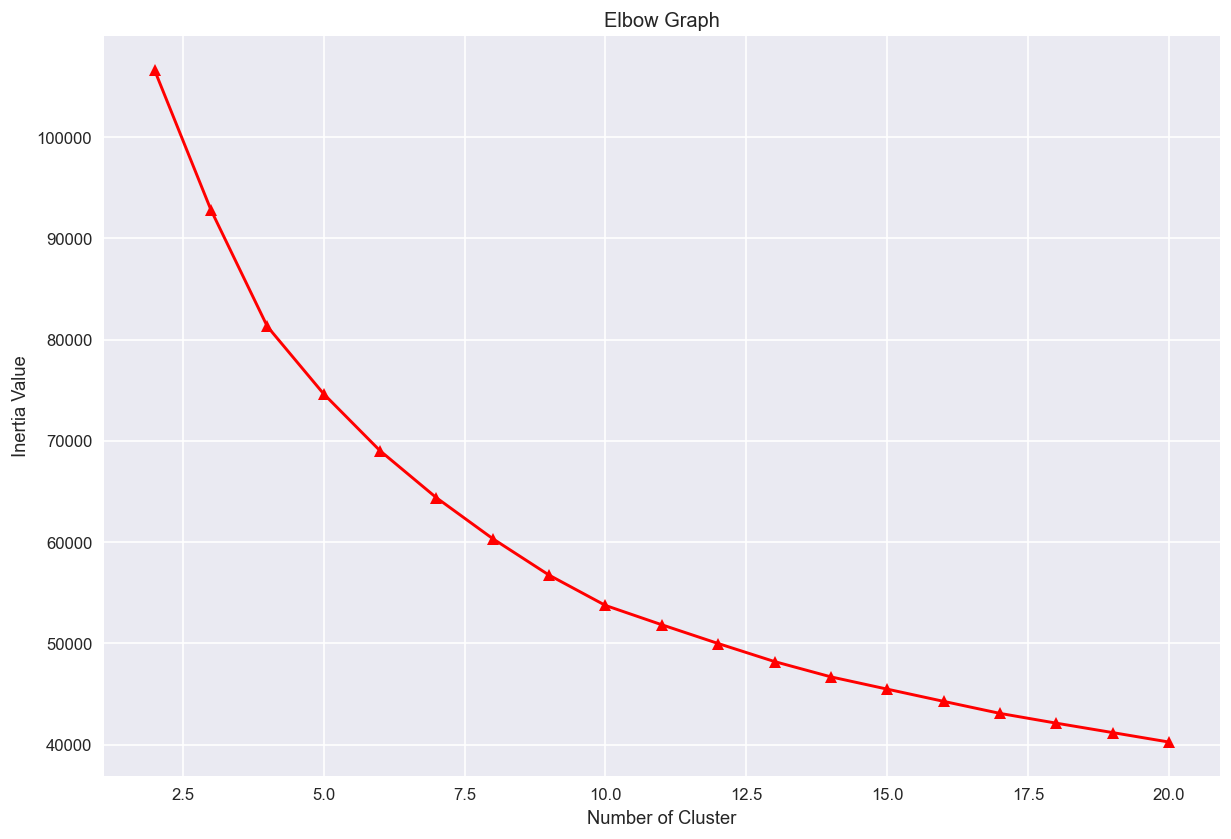

In [99]:
inertia_values =[]

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df_3)
    model=KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    inertia_values.append(model.inertia_)

plt.style.use('seaborn') 
plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [100]:
kl= KneeLocator(range(2,21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

8

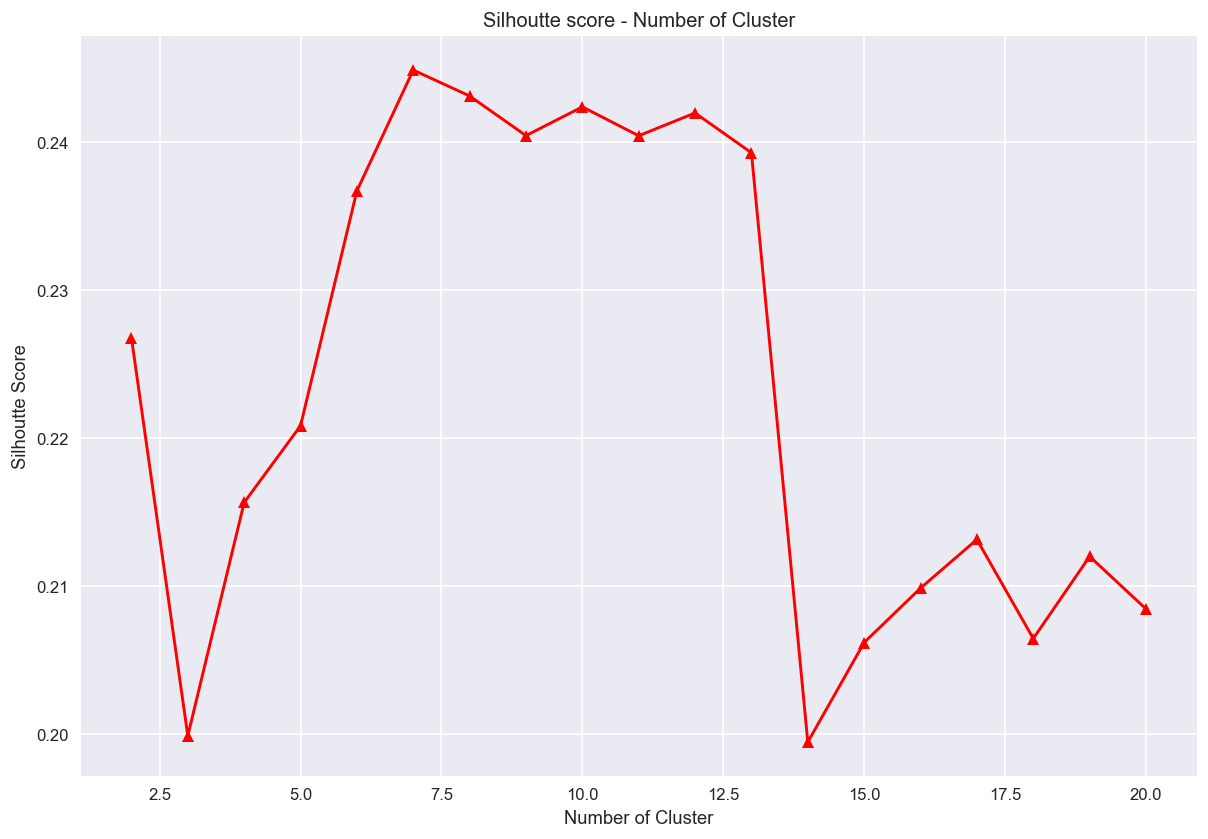

In [101]:
silhoutte_coefs = []

for k in range(2,21):
    scaler = StandardScaler()
    x = scaler.fit_transform(df_3)
    model=KMeans(n_clusters = k, **kmeans_constants)
    model.fit(x)
    silhoutte_coefs.append(metrics.silhouette_score(x,model.labels_))

plt.figure(figsize = (12,8),dpi = 120)
plt.plot(range(2,21),silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte score - Number of Cluster')
plt.show()

In [102]:
scaler = StandardScaler()
x = scaler.fit_transform(df_3)
model = KMeans(n_clusters = 6,**kmeans_constants)
model.fit(x)

KMeans(n_clusters=6, n_init=100, random_state=1)

In [103]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_),columns = df_3.columns)

In [104]:
centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1531.099197           0.976253   286.834681        235.775244   
1   923.322899           0.967627  1317.520614        607.362295   
2   903.758780           0.833037   440.462091        268.454165   
3   129.518695           0.431864   388.894496        241.897752   
4  5392.044358           0.971238   583.933259        364.940612   
5  3287.984147           0.986402  6726.351866       4390.423230   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               51.238963    735.369563             0.197451   
1              710.490517    230.096993             0.907951   
2              172.494149   1124.563706             0.446580   
3              147.271304    326.298421             0.277708   
4              219.071412   5065.982646             0.314957   
5             2337.364043    648.697773             0.950256   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
0                          0.070695          3.129831       3.684407   
1                          0.766671          0.963183      24.074749   
2                          0.302645          3.387358       5.940032   
3                          0.185039          0.796485       4.668825   
4                          0.212493         14.297647       8.618824   
5                          0.795760          2.086124      83.732057   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   3331.107345  1015.484370        730.221874          0.022603  11.877966  
1   4391.528524  1425.043780        601.483608          0.271498  11.899591  
2   2509.918963   644.042227        349.340906          0.170032   7.333874  
3   3936.185677  1284.077467        159.037666          0.290795  11.816836  
4   8646.534759  4155.749081       2751.466539          0.035626  11.671765  
5   9275.119617  6419.805216       1499.700797          0.292228  11.959330

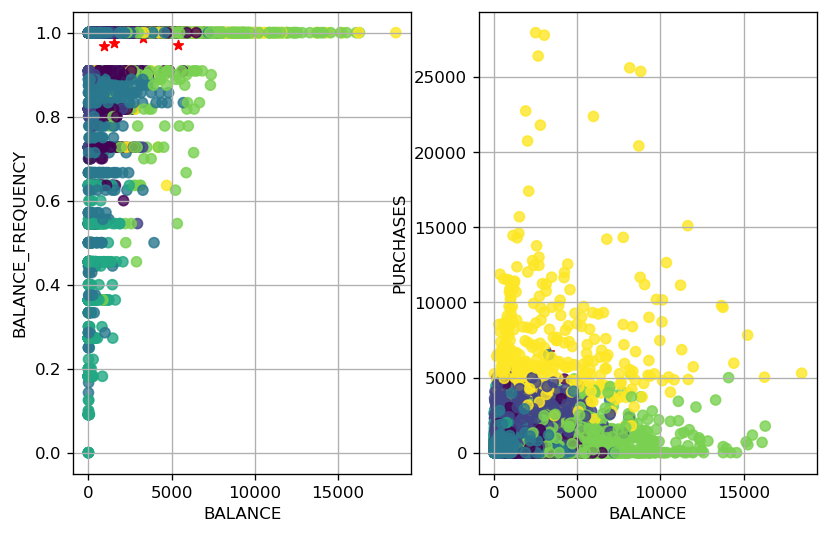

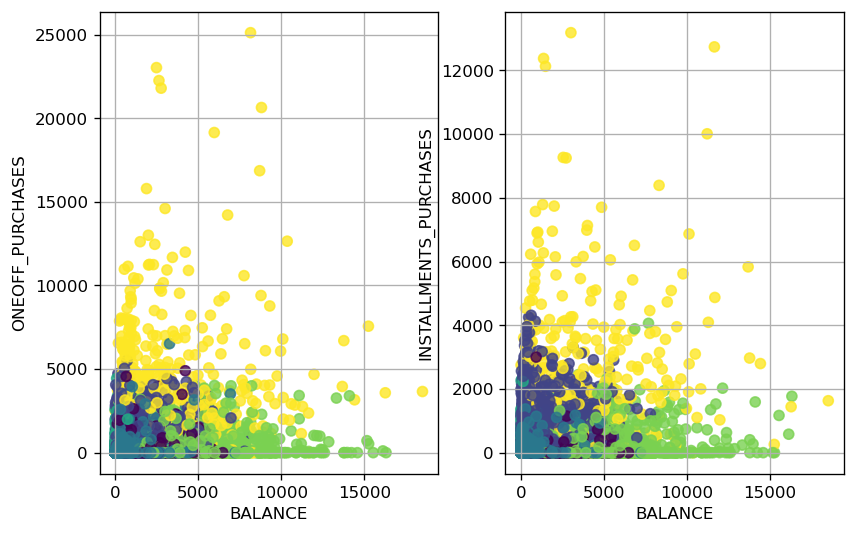

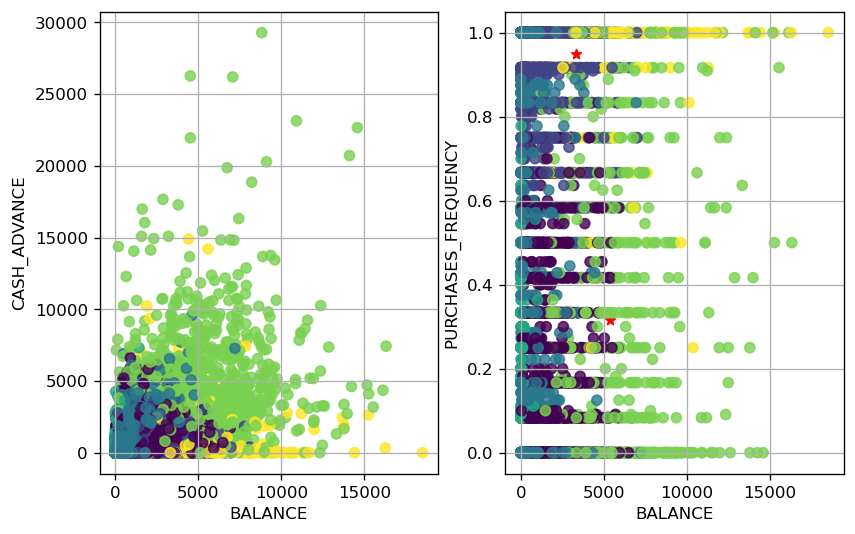

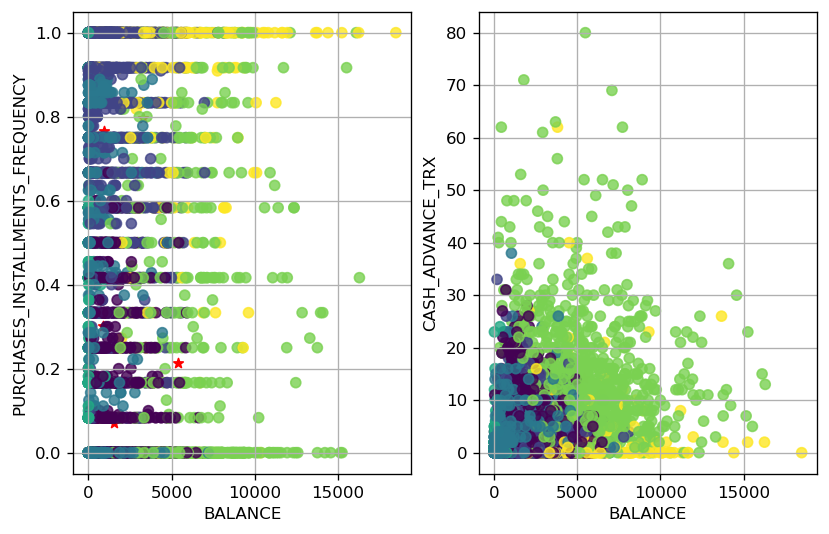

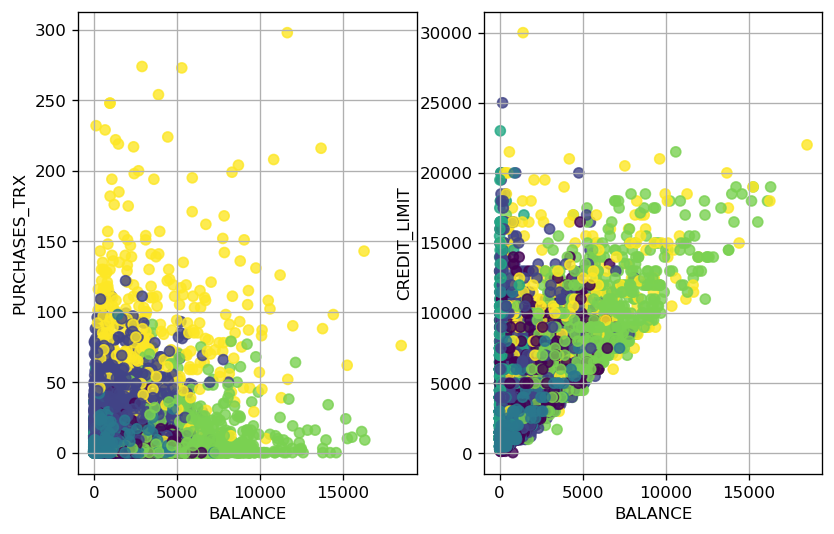

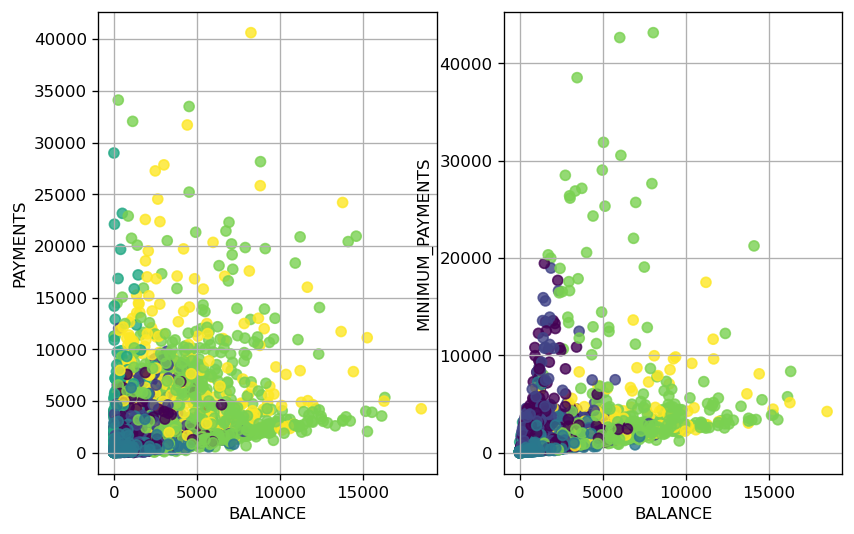

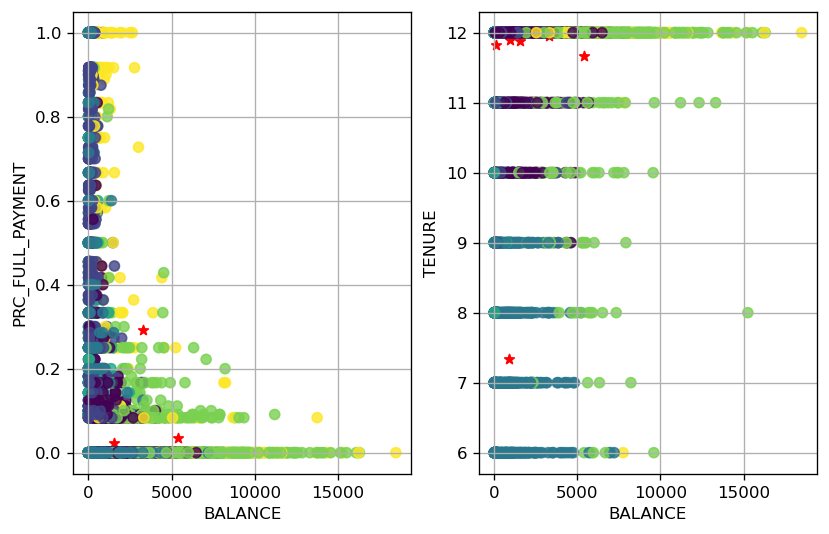

In [105]:
plt.style.use('default')
i = 1
while i < len(df_3.columns):
    try:
        fig = plt.figure(figsize =(8,5),dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'],centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'],df_3[df_3.columns[i]],
                   c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'],centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'],df_3[df_3.columns[i]],
                      c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [106]:
print('Inertia:', model.inertia_)
print('Silhouette Score:',metrics.silhouette_score(x,model.labels_))
print('CM Score:', metrics.calinski_harabasz_score(x,model.labels_))
print('DB Score:',metrics.davies_bouldin_score(x,model.labels_))

Inertia: 69021.04317071053
Silhouette Score: 0.23671287354057483
CM Score: 1496.367284717596
DB Score: 1.2913156658294713


# DBSCAN Algorithms 

In [107]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

# Creat an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
x= scaler.fit_transform(df_2)

#Fit the model to your data
dbscan.fit(x)

# Get the cluster labels
cluster_labels =  dbscan.labels_

# Check the number of unique labels
num_labels = len(np.unique(cluster_labels))

silhouette = metrics.silhouette_score(x, cluster_labels)
print('Silhouette Score:',silhouette)

Silhouette Score: -0.43663761110553917


In [108]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

#create an instance of AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)

x= scaler.fit_transform(df_2)

#Fit the model to your data agg_cluster
agg_cluster.fit(x)

# Get the cluster Labels
cluster_labels = agg_cluster.labels_

#Perform further analysis or visualization with the cluster labels

In [109]:
silhouette = metrics.silhouette_score(x,cluster_labels)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.17847661104029677


# Final Model

In [110]:
scaler = StandardScaler()
x = scaler.fit_transform(df_2)
model = KMeans(n_clusters = 3,**kmeans_constants)
model.fit(x)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [111]:
print('Inertia:', model.inertia_)
print('Silhouette Score:',metrics.silhouette_score(x,model.labels_))
print('CM Score:', metrics.calinski_harabasz_score(x,model.labels_))
print('DB Score:',metrics.davies_bouldin_score(x,model.labels_))

Inertia: 104782.83041635097
Silhouette Score: 0.254461481120404
CM Score: 1703.5316399655458
DB Score: 1.5832138382790895


In [112]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_),columns = df_2.columns)

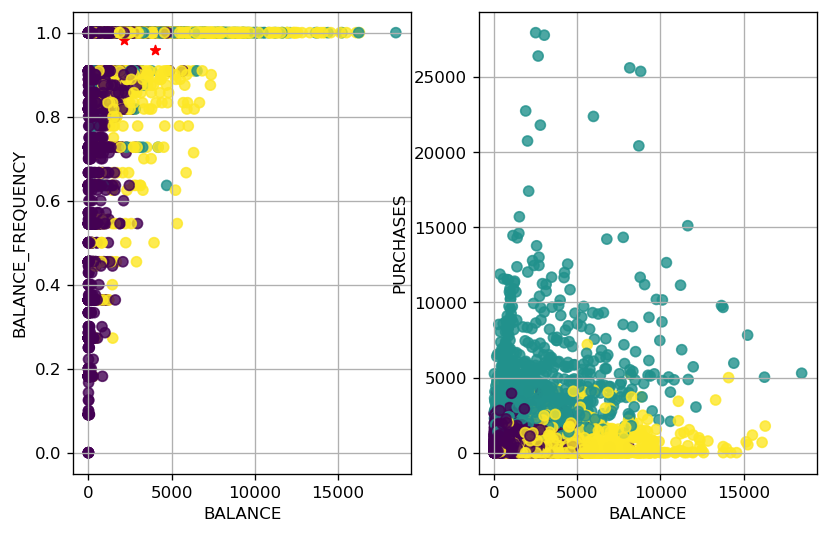

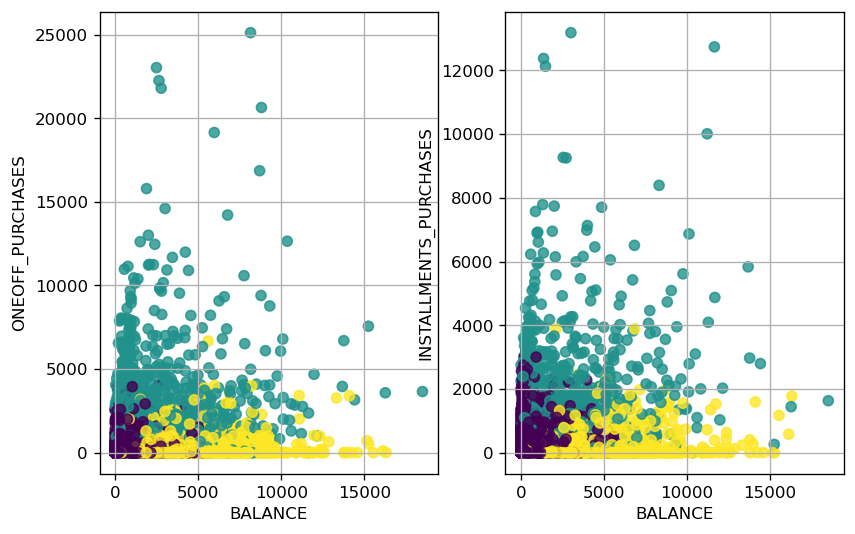

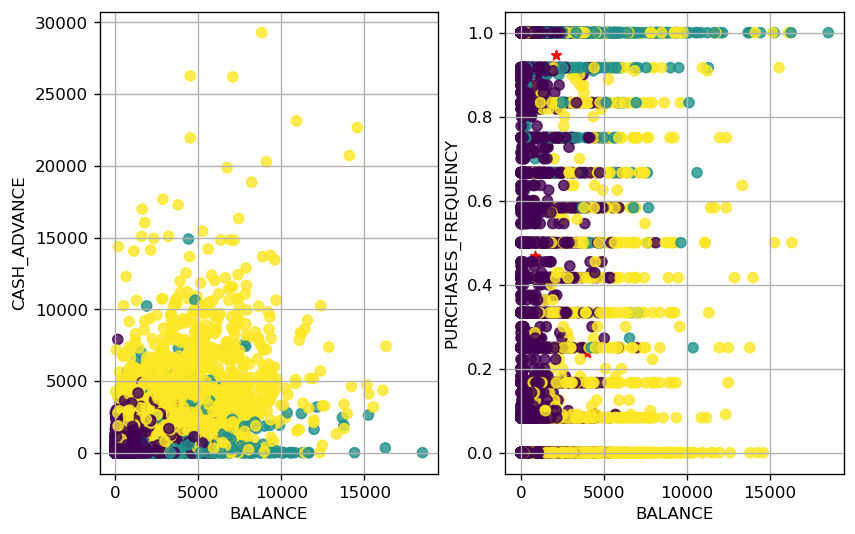

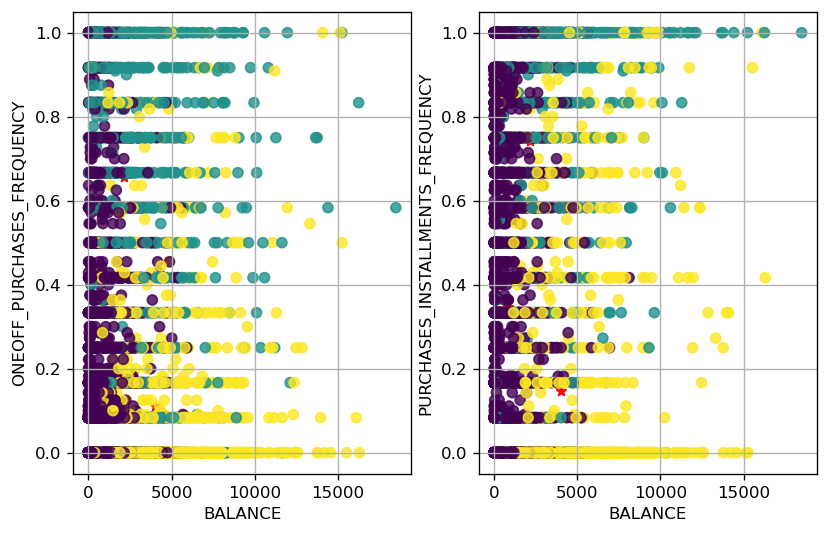

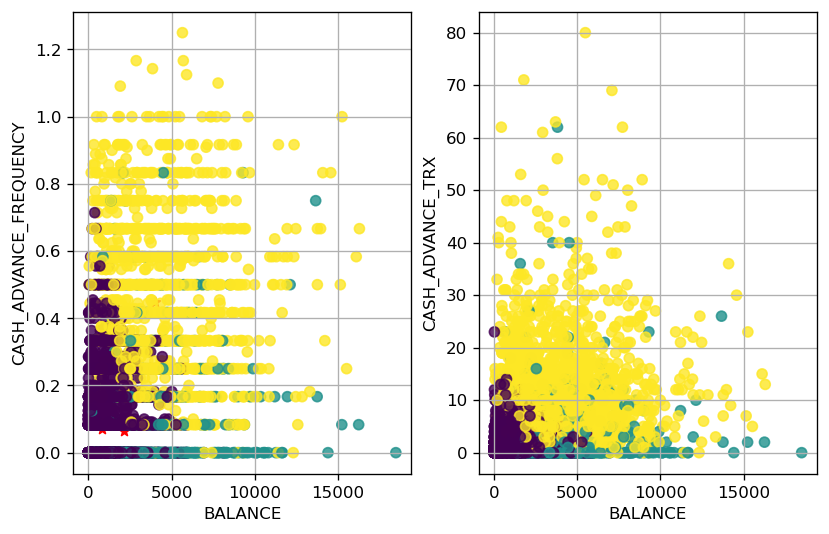

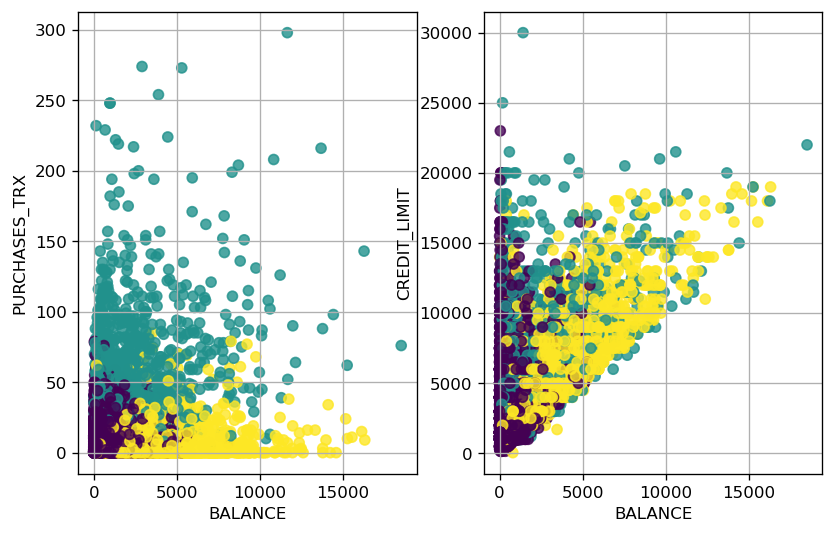

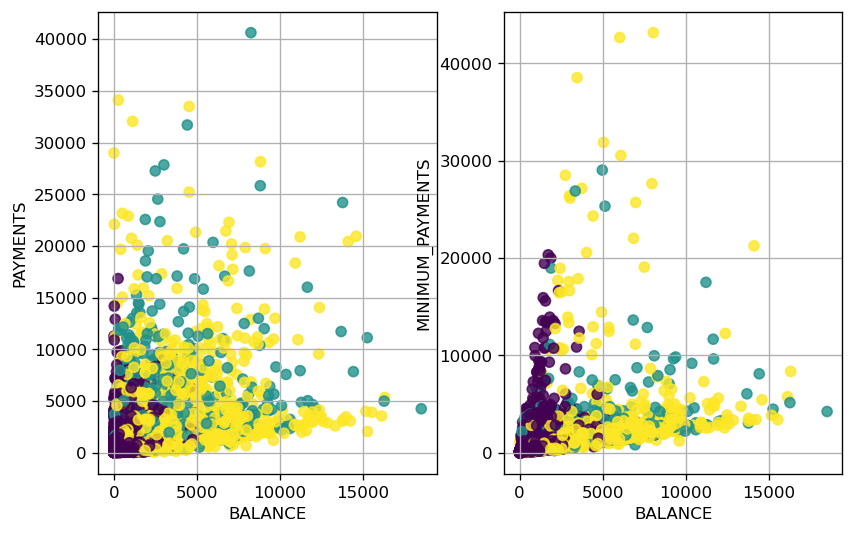

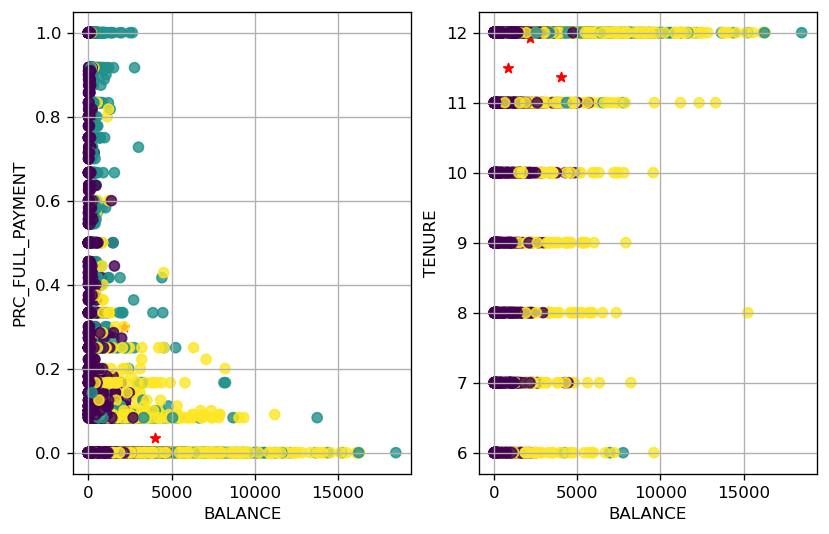

In [113]:
plt.style.use('default')
i = 1
while i < len(df_2.columns):
    try:
        fig = plt.figure(figsize =(8,5),dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'],centroids[df_2.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'],df_2[df_2.columns[i]],
                   c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_2.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'],centroids[df_2.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'],df_2[df_2.columns[i]],
                      c = model.labels_.astype(float),alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_2.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()